# NDIBE IFEOMA - DATA SCIENCE 

## CUSTOMER SEGMENTATION (STERLING E- COMMERCE)

In [228]:
!pip install --upgrade matplotlib==3.4.3

In [229]:
!pip install --upgrade seaborn missingno

In [230]:
import pandas as pd #Data preprocessing
import numpy as np
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns #Data Visualization
import missingno as msno #Missing data - Data Visualization
from collections import Counter #Counting

In [231]:
df = pd.read_excel(r"C:\Users\hp\Desktop\10ALYTICS\Sterling E-Commerce Data new.xlsx")

In [232]:
# Visualize the Table
df.head()

Category           City     County  Cust Id Customer Since  \
0  Health & Sports           Bode   Humboldt   112285     2008-02-11   
1    Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
2    Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
3        Computing  Young America     Carver   112501     2013-09-15   
4    Entertainment  Young America     Carver   112501     2013-09-15   

  Date of Order        Full Name Gender  Item Id     Order Id Payment Method  \
0    2022-08-07   Renaud, Maudie      F   880913  100547952.0     Easypay_MA   
1    2022-08-08   Shimp, Mariela      F   881493  100548328.0     Easypay_MA   
2    2022-08-08   Shimp, Mariela      F   881492  100548328.0     Easypay_MA   
3    2022-08-18  Doiron, Latrina      F   886067  100551079.0        Payaxis   
4    2022-08-20  Doiron, Latrina      F   886878  100551618.0        Payaxis   

      Place Name  Ref Num   Region State User Name    Zip  Qty Ordered   Total  
0           Bode   352808  Midwest    IA  mcrenaud  50519            3    32.0  
1     Belleville   310849  Midwest    IL   mgshimp  62223            2    74.8  
2     Belleville   310849  Midwest    IL   mgshimp  62223            2    74.9  
3  Young America   578056  Midwest    MN  lmdoiron  55552            2  6822.9  
4  Young America   578056  Midwest    MN  lmdoiron  55552            2  2849.9

In [233]:
#View top and bottom cells
df

Category           City     County  Cust Id Customer Since  \
0       Health & Sports           Bode   Humboldt   112285     2008-02-11   
1         Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
2         Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
3             Computing  Young America     Carver   112501     2013-09-15   
4         Entertainment  Young America     Carver   112501     2013-09-15   
...                 ...            ...        ...      ...            ...   
283078  Women's Fashion  Burkettsville     Mercer    81251     2013-10-15   
283079  Women's Fashion  Burkettsville     Mercer    81251     2013-10-15   
283080  Women's Fashion  Burkettsville     Mercer    81251     2013-10-15   
283081  Women's Fashion  Burkettsville     Mercer    81251     2013-10-15   
283082  Women's Fashion  Burkettsville     Mercer    81251     2013-10-15   

       Date of Order         Full Name Gender  Item Id     Order Id  \
0         2022-08-07    Renaud, Maudie      F   880913  100547952.0   
1         2022-08-08    Shimp, Mariela      F   881493  100548328.0   
2         2022-08-08    Shimp, Mariela      F   881492  100548328.0   
3         2022-08-18   Doiron, Latrina      F   886067  100551079.0   
4         2022-08-20   Doiron, Latrina      F   886878  100551618.0   
...              ...               ...    ...      ...          ...   
283078    2021-12-30  Kester, Apolonia      F   700522  100428972.0   
283079    2021-12-30  Kester, Apolonia      F   700518  100428972.0   
283080    2021-12-30  Kester, Apolonia      F   700520  100428972.0   
283081    2021-12-30  Kester, Apolonia      F   700517  100428972.0   
283082    2021-12-30  Kester, Apolonia      F   700519  100428972.0   

       Payment Method     Place Name  Ref Num   Region State User Name    Zip  \
0          Easypay_MA           Bode   352808  Midwest    IA  mcrenaud  50519   
1          Easypay_MA     Belleville   310849  Midwest    IL   mgshimp  62223   
2          Easypay_MA     Belleville   310849  Midwest    IL   mgshimp  62223   
3             Payaxis  Young America   578056  Midwest    MN  lmdoiron  55552   
4             Payaxis  Young America   578056  Midwest    MN  lmdoiron  55552   
...               ...            ...      ...      ...   ...       ...    ...   
283078            cod  Burkettsville   572291  Midwest    OH  azkester  45310   
283079            cod  Burkettsville   572291  Midwest    OH  azkester  45310   
283080            cod  Burkettsville   572291  Midwest    OH  azkester  45310   
283081            cod  Burkettsville   572291  Midwest    OH  azkester  45310   
283082            cod  Burkettsville   572291  Midwest    OH  azkester  45310   

        Qty Ordered   Total  
0                 3    32.0  
1                 2    74.8  
2                 2    74.9  
3                 2  6822.9  
4                 2  2849.9  
...             ...     ...  
283078            2    69.8  
283079            2    69.9  
283080            2    79.8  
283081            2    79.9  
283082            2    79.9  

[283083 rows x 19 columns]

In [234]:
#Dimensionality of the data -The number of rows and columns
df.shape

(283083, 19)

In [235]:
#Examine the columns/feautures of the data
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [236]:
# Investigate the dataset for anomalies and data types. This will help in creating a variety of data visualizations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283083 entries, 0 to 283082
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Category        283083 non-null  object        
 1   City            283083 non-null  object        
 2   County          283083 non-null  object        
 3   Cust Id         283083 non-null  int64         
 4   Customer Since  283083 non-null  datetime64[ns]
 5   Date of Order   283083 non-null  datetime64[ns]
 6   Full Name       283083 non-null  object        
 7   Gender          283083 non-null  object        
 8   Item Id         283083 non-null  int64         
 9   Order Id        283078 non-null  float64       
 10  Payment Method  283083 non-null  object        
 11  Place Name      283083 non-null  object        
 12  Ref Num         283083 non-null  int64         
 13  Region          283083 non-null  object        
 14  State           283083 non-null  obj

In [237]:
#Numerical Statistical Analysis
df.describe()

Cust Id        Item Id      Order Id        Ref Num  \
count  283083.000000  283083.000000  2.830780e+05  283083.000000   
mean    70106.816026  741747.110628  1.004570e+08  561107.885991   
std     30215.394879   95664.609013  6.090992e+04  256101.205409   
min         4.000000  574769.000000  1.003547e+08  111127.000000   
25%     56640.000000  659898.500000  1.004047e+08  341071.000000   
50%     74320.000000  742471.000000  1.004518e+08  565623.000000   
75%     92371.000000  826078.500000  1.005134e+08  782211.000000   
max    115326.000000  905208.000000  1.005624e+08  999981.000000   

                 Zip    Qty Ordered          Total  
count  283083.000000  283083.000000  283083.000000  
mean    49147.171374       3.008224     816.230712  
std     27235.561738       4.565168    1986.164932  
min       210.000000       1.000000       0.000000  
25%     26264.000000       2.000000      49.900000  
50%     48808.000000       2.000000     149.800000  
75%     72004.000000       3.000000     800.000000  
max     99402.000000     501.000000  101262.590000

In [238]:
#Categorical Statistical Analysis
df.describe(include=["object", "bool"])

Category    City     County       Full Name  Gender  \
count              283083  283083     283083          283083  283083   
unique                 15   15668       2518           63610       2   
top     Mobiles & Tablets  Dekalb  Jefferson  Gonzalez, Joel       M   
freq                60954    2525       3510            2524  144295   

       Payment Method Place Name  Region   State   User Name  
count          283083     283083  283083  283083      283083  
unique             13      15668       4      49       63407  
top               cod     Dekalb   South      TX  jugonzalez  
freq           101750       2525  103482   17510        2524

From the above one can see that Mobile & Tablets were sold most.

DATA CLEANING AND PREPARATION

INVESTIGATING THE MISSING DATA

In [239]:
null_vals=df.isnull().sum()

In [240]:
null_vals

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          5
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

Order Id has 5 missing data

### Find the columns (and rows) with the missing values

In [241]:
df[df.isnull().any(axis=1)] 

Category          City    County  Cust Id Customer Since  \
38758             Soghaat  Leiters Ford    Fulton   111867     2010-11-04   
38759             Soghaat  Leiters Ford    Fulton   111867     2010-11-04   
133217  Mobiles & Tablets    Rock Point   Charles    92075     2014-04-08   
145889  Mobiles & Tablets     Uniopolis  Auglaize   111166     2017-02-23   
224999          Computing    Barrington    Camden    40853     2009-08-24   

       Date of Order            Full Name Gender  Item Id  Order Id  \
38758     2022-08-04          Wright, Man      M   879766       NaN   
38759     2022-08-04          Wright, Man      M   879765       NaN   
133217    2022-04-01  Torkelson, Berneice      F   767619       NaN   
145889    2022-07-21      Cannon, Shamika      F   872703       NaN   
224999    2022-08-12    Robichaux, Marion      M   883358       NaN   

       Payment Method    Place Name  Ref Num     Region State    User Name  \
38758             cod  Leiters Ford   939999    Midwest    IN     mewright   
38759             cod  Leiters Ford   939999    Midwest    IN     mewright   
133217            cod    Rock Point   715389      South    MD  bttorkelson   
145889            cod     Uniopolis   406105    Midwest    OH     svcannon   
224999            cod    Barrington   986961  Northeast    NJ  mjrobichaux   

          Zip  Qty Ordered   Total  
38758   46945            2    36.0  
38759   46945            3    45.0  
133217  20682            2  2919.9  
145889  45888            2   578.9  
224999   8007            2    39.9

From the above the null values are missing numbers, Order Id which is 5, Since they are only 5 out of 283083, they are insignificant.We suggest the company can drop the missing data, if the missing values cannot be found.


In [242]:
df.dropna(inplace=True) # To drop missing data

In [243]:
df.isnull().sum() #To verify if missing data has been removed:

Category          0
City              0
County            0
Cust Id           0
Customer Since    0
Date of Order     0
Full Name         0
Gender            0
Item Id           0
Order Id          0
Payment Method    0
Place Name        0
Ref Num           0
Region            0
State             0
User Name         0
Zip               0
Qty Ordered       0
Total             0
dtype: int64

In [244]:
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [Category, City, County, Cust Id, Customer Since, Date of Order, Full Name, Gender, Item Id, Order Id, Payment Method, Place Name, Ref Num, Region, State, User Name, Zip, Qty Ordered, Total]
Index: []

## DATA VISUALIZATIONS

## UNIVARIATE ANALYSIS

<AxesSubplot:ylabel='Gender'>

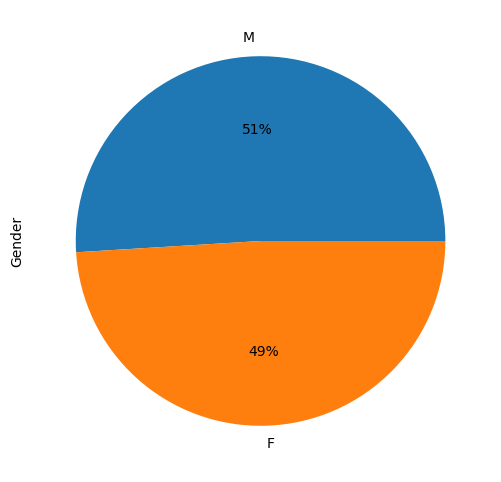

In [245]:
# Plot a Pie Chart 
df.Gender.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

<AxesSubplot:ylabel='Region'>

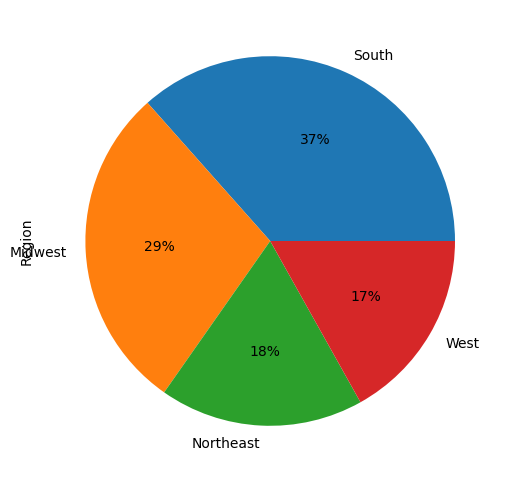

In [246]:
# Plot a Pie Chart 
df.Region.value_counts().plot(kind='pie', autopct='%1.0f%%', figsize=(6,6))

This plot chart revealed that the South region had the highest

### Categories of goods that are most frequently ordered.

In [247]:
procat = df.groupby("Category")[["Qty Ordered"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Category", var_name="Metric",value_name="Total")
procat

Category       Metric   Total
0           Appliances  Qty Ordered   81688
1    Beauty & Grooming  Qty Ordered   69981
2                Books  Qty Ordered    2131
3            Computing  Qty Ordered   20293
4        Entertainment  Qty Ordered   34330
5      Health & Sports  Qty Ordered   28388
6        Home & Living  Qty Ordered   41275
7          Kids & Baby  Qty Ordered   20454
8        Men's Fashion  Qty Ordered  101212
9    Mobiles & Tablets  Qty Ordered  133217
10              Others  Qty Ordered  108540
11  School & Education  Qty Ordered    4406
12             Soghaat  Qty Ordered   28032
13          Superstore  Qty Ordered   99503
14     Women's Fashion  Qty Ordered   78116

### Total amount paid for each category of goods - Mobiles & Tablets fetched most money

## BIVARIATE ANALYSIS

In [248]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

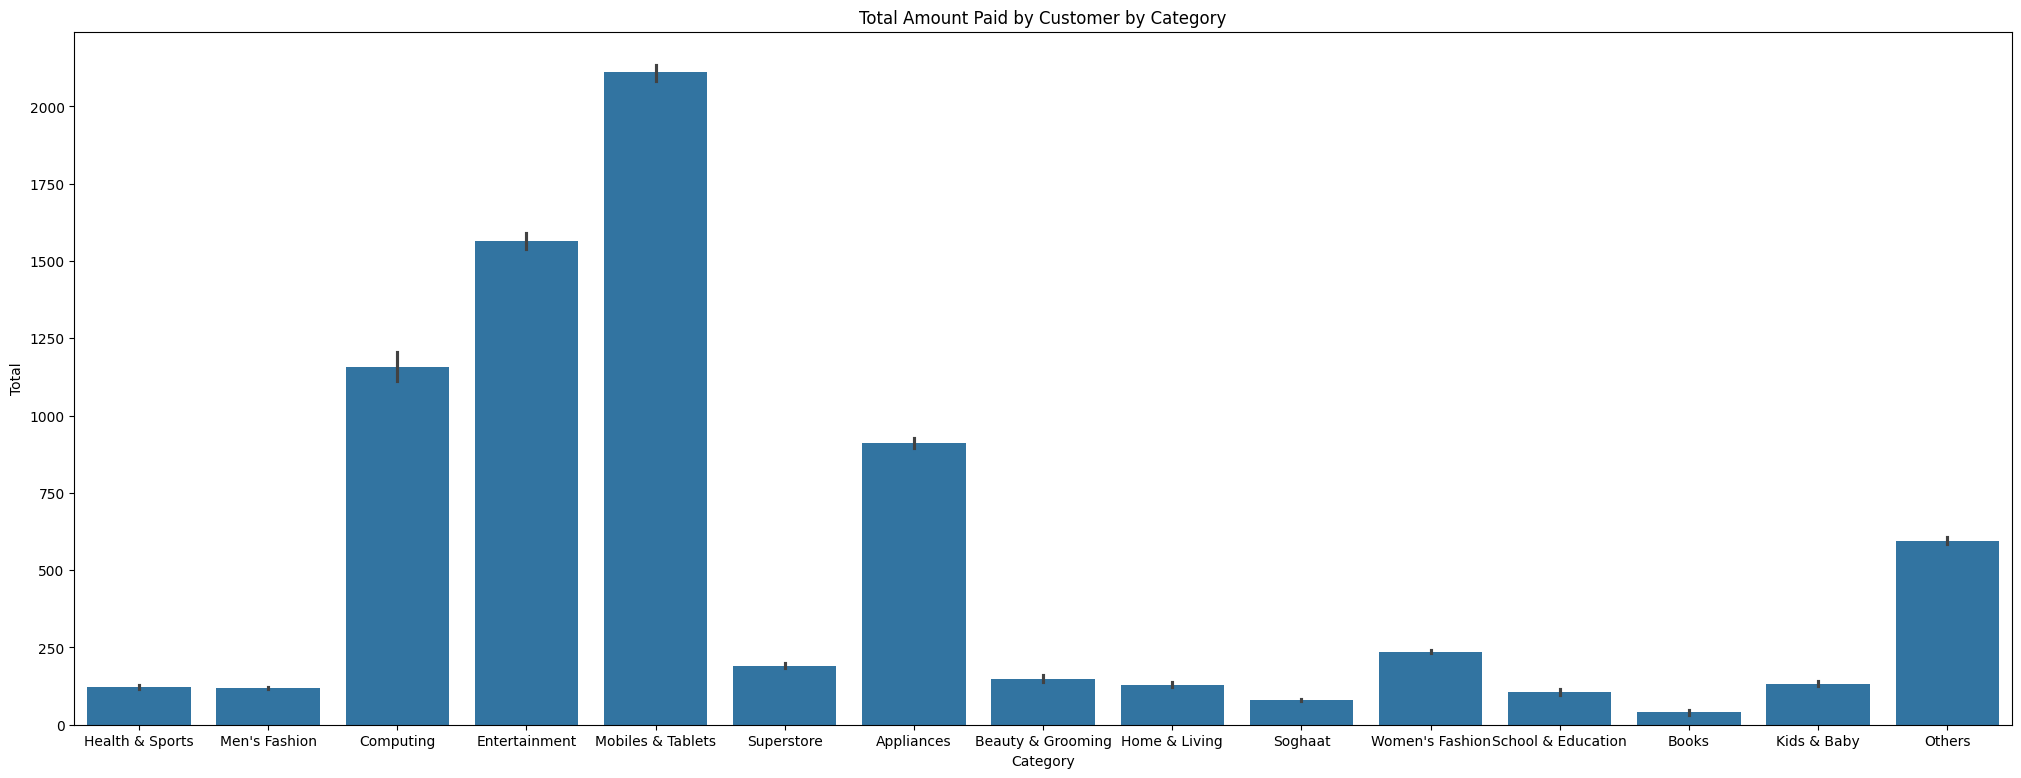

In [249]:
# Comparing the Total Amount paid by Customer and Category.
plt.figure(figsize=(25,9));
sns.barplot(x="Category", data=df, y="Total")
plt.title("Total Amount Paid by Customer by Category");

#### From the barchart, Mobile & Tablets had the highest amount paid by customers, while the least paid is books.

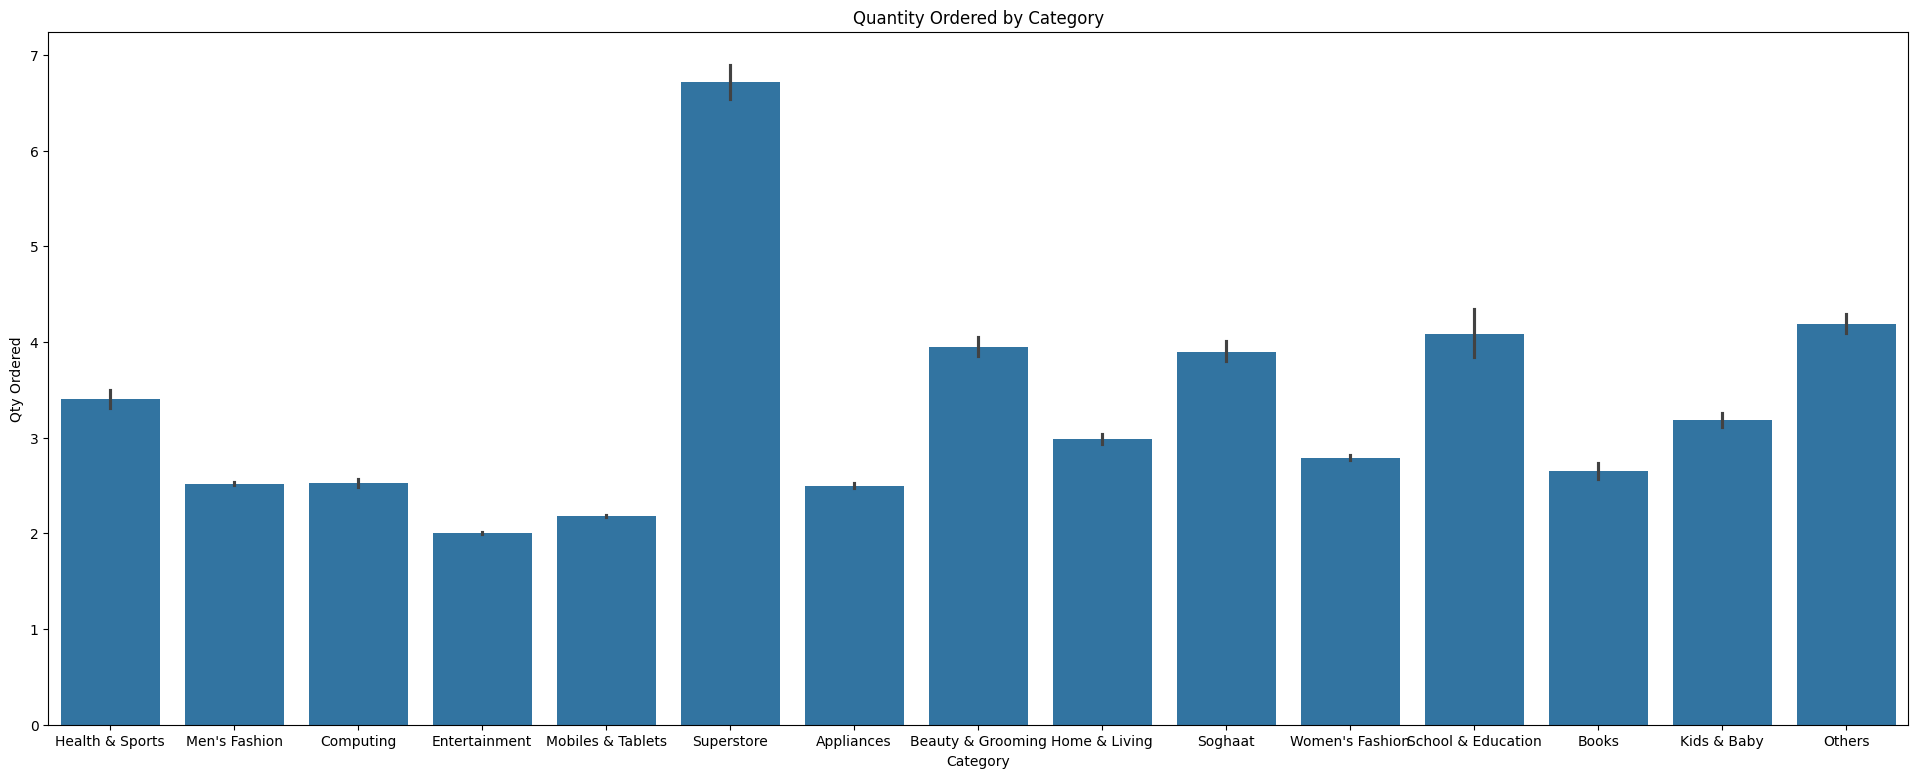

In [250]:
# Category of Goods ordered byQuantity 
plt.figure(figsize=(24,9));
sns.barplot(x="Category", data=df, y="Qty Ordered")
plt.title("Quantity Ordered by Category");

#### The Category of goods ordered most by customers came from the Superstore section

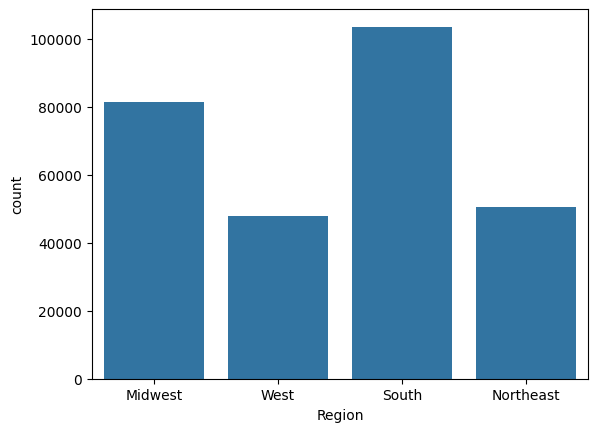

In [251]:
# Compare the total sales per region
sns.countplot(x="Region", data=df)
plt.show()

# Select top 10 states by Total

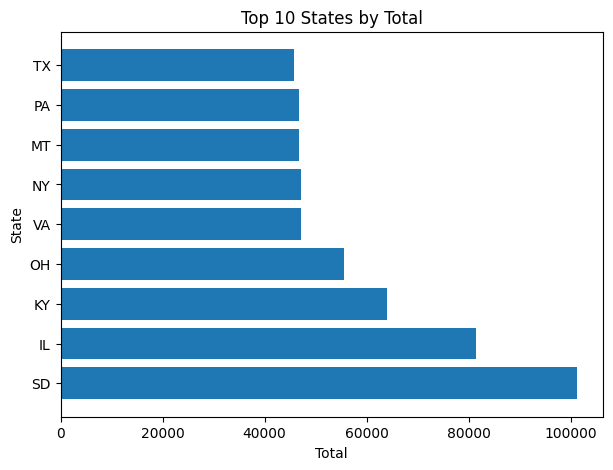

In [252]:
# Select top 10 states by Total
top_10_states = df.nlargest(20, 'Total')

# reset the index
top_10_states = top_10_states.reset_index(drop=True)

# plot a barchart
plt.figure(figsize=(7,5))
plt.barh(top_10_states['State'], top_10_states['Total'])
plt.xlabel('Total')
plt.ylabel('State')
plt.title('Top 10 States by Total')
plt.show()

# Select top 10 Customers by Total

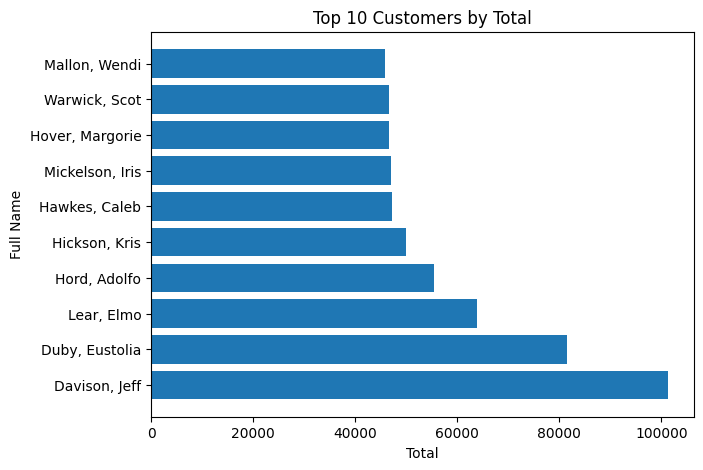

In [253]:
# Select top 10 Customers by Total
top_10_Customer = df.nlargest(20, 'Total')

# reset the index
top_10_Customer = top_10_Customer.reset_index(drop=True)

# plot a barchart
plt.figure(figsize=(7,5))
plt.barh(top_10_states['Full Name'], top_10_states['Total'])
plt.xlabel('Total')
plt.ylabel('Full Name')
plt.title('Top 10 Customers by Total')
plt.show()

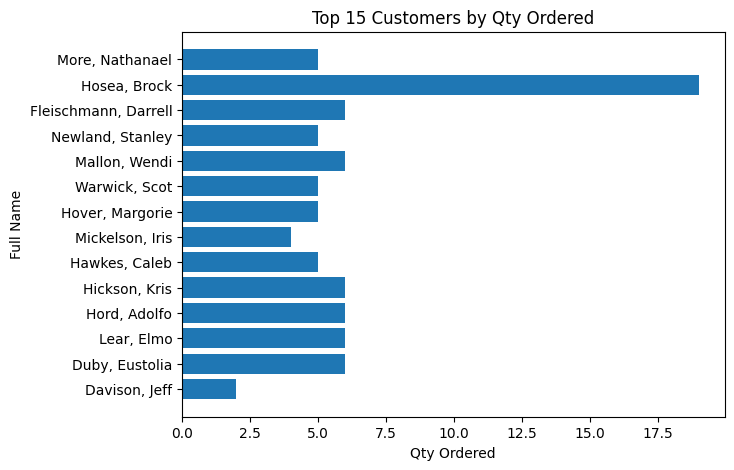

In [254]:
# Select top 10 Customers by Total
top_15_Customer = df.nlargest(30, 'Total')

# reset the index
top_15_Customer = top_15_Customer.reset_index(drop=True)

# plot a barchart
plt.figure(figsize=(7,5))
plt.barh(top_15_Customer['Full Name'], top_15_Customer['Qty Ordered'])
plt.xlabel('Qty Ordered')
plt.ylabel('Full Name')
plt.title('Top 15 Customers by Qty Ordered')
plt.show()

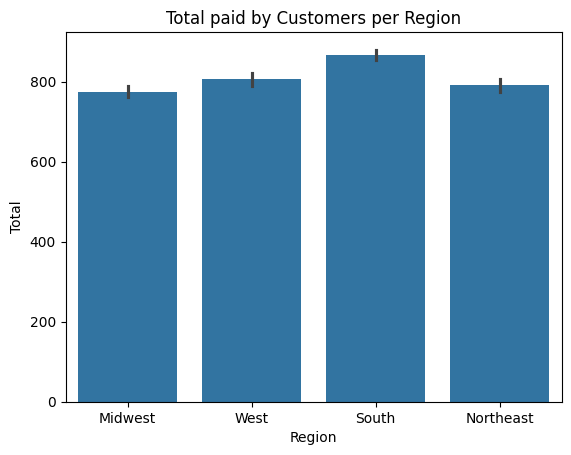

In [255]:
sns.barplot(x="Region", data=df, y="Total")
plt.title("Total paid by Customers per Region");

#### Sales patterns in different regions - Most of the revenue came from the South Region.

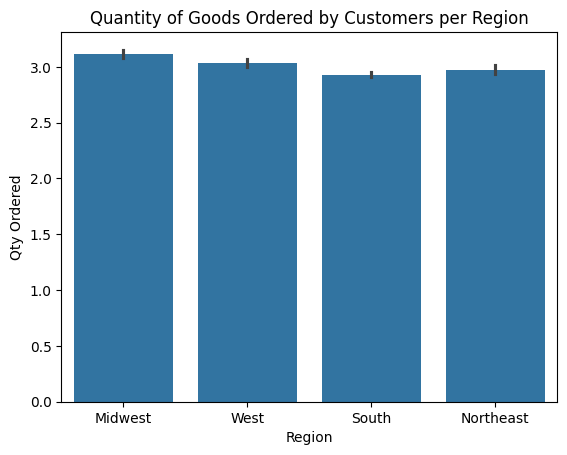

In [256]:
sns.barplot(x="Region", data=df, y="Qty Ordered")
plt.title("Quantity of Goods Ordered by Customers per Region");

#### No much difference among quantity of goods ordered by customers per region, but it is slightly highest in the Midwest.

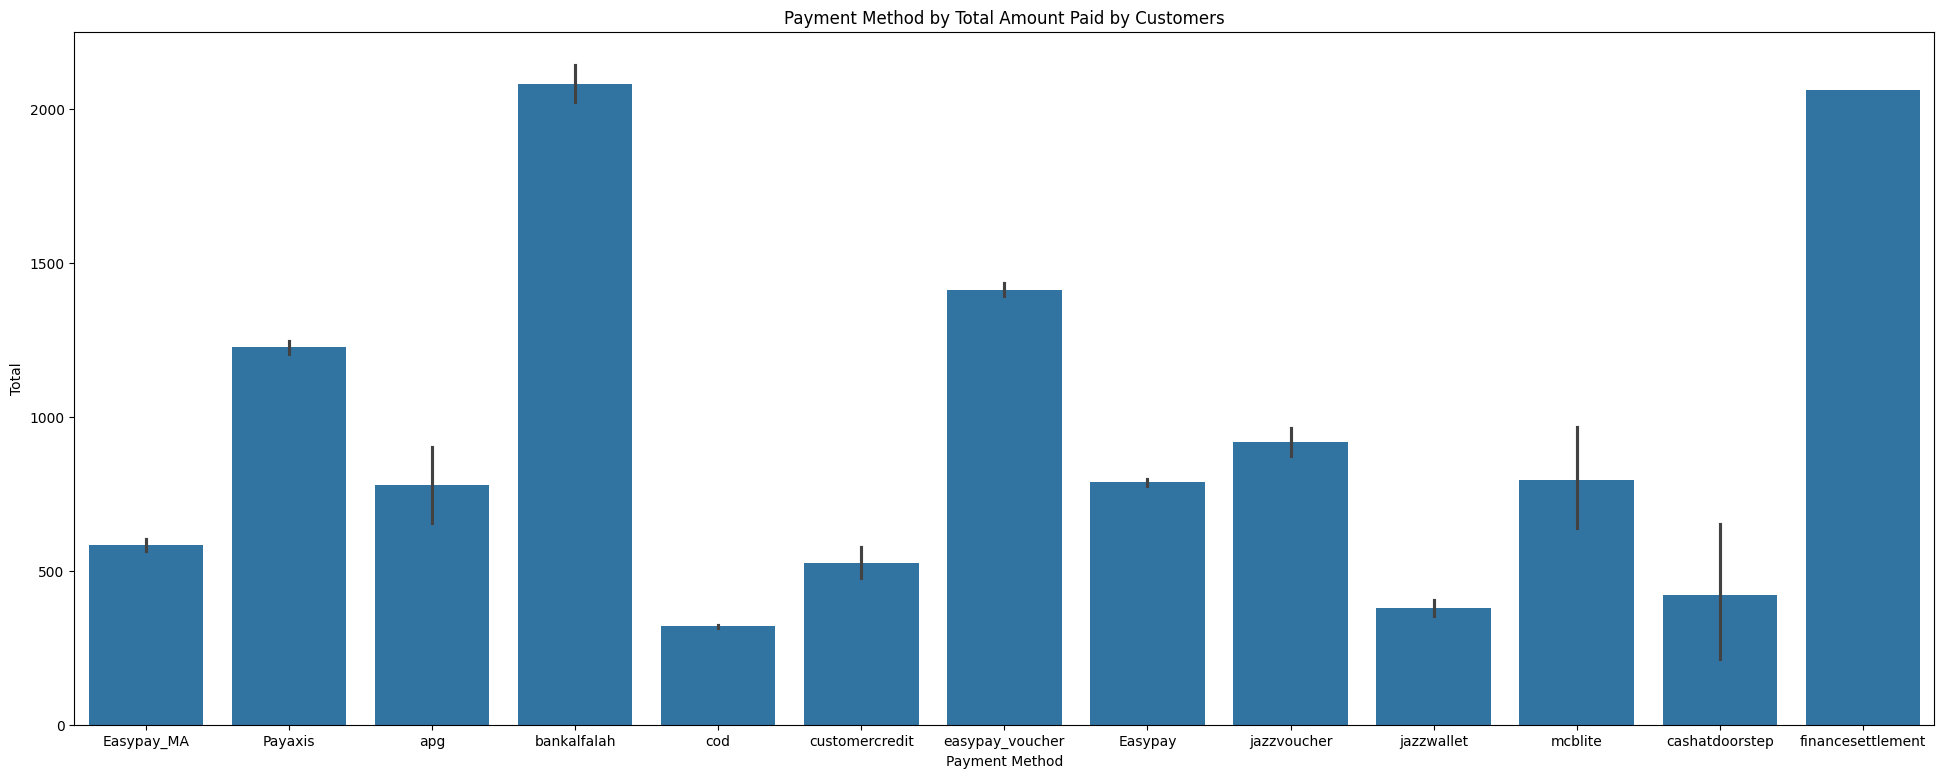

In [257]:
plt.figure(figsize=(24,9));
sns.barplot(x="Payment Method", data=df, y="Total")
plt.title("Payment Method by Total Amount Paid by Customers");

#### Bankalfalah and financesettlement are the most preferred methods of payment

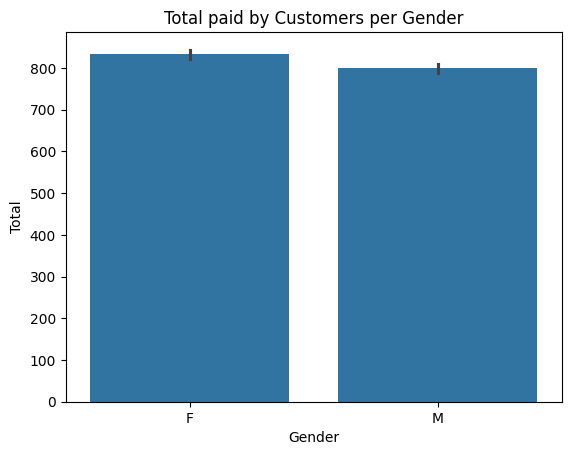

In [258]:
sns.barplot(x="Gender", data=df, y="Total")
plt.title("Total paid by Customers per Gender");

Based on the above illustration, the females out spent the males.

# Payment Method by Gender

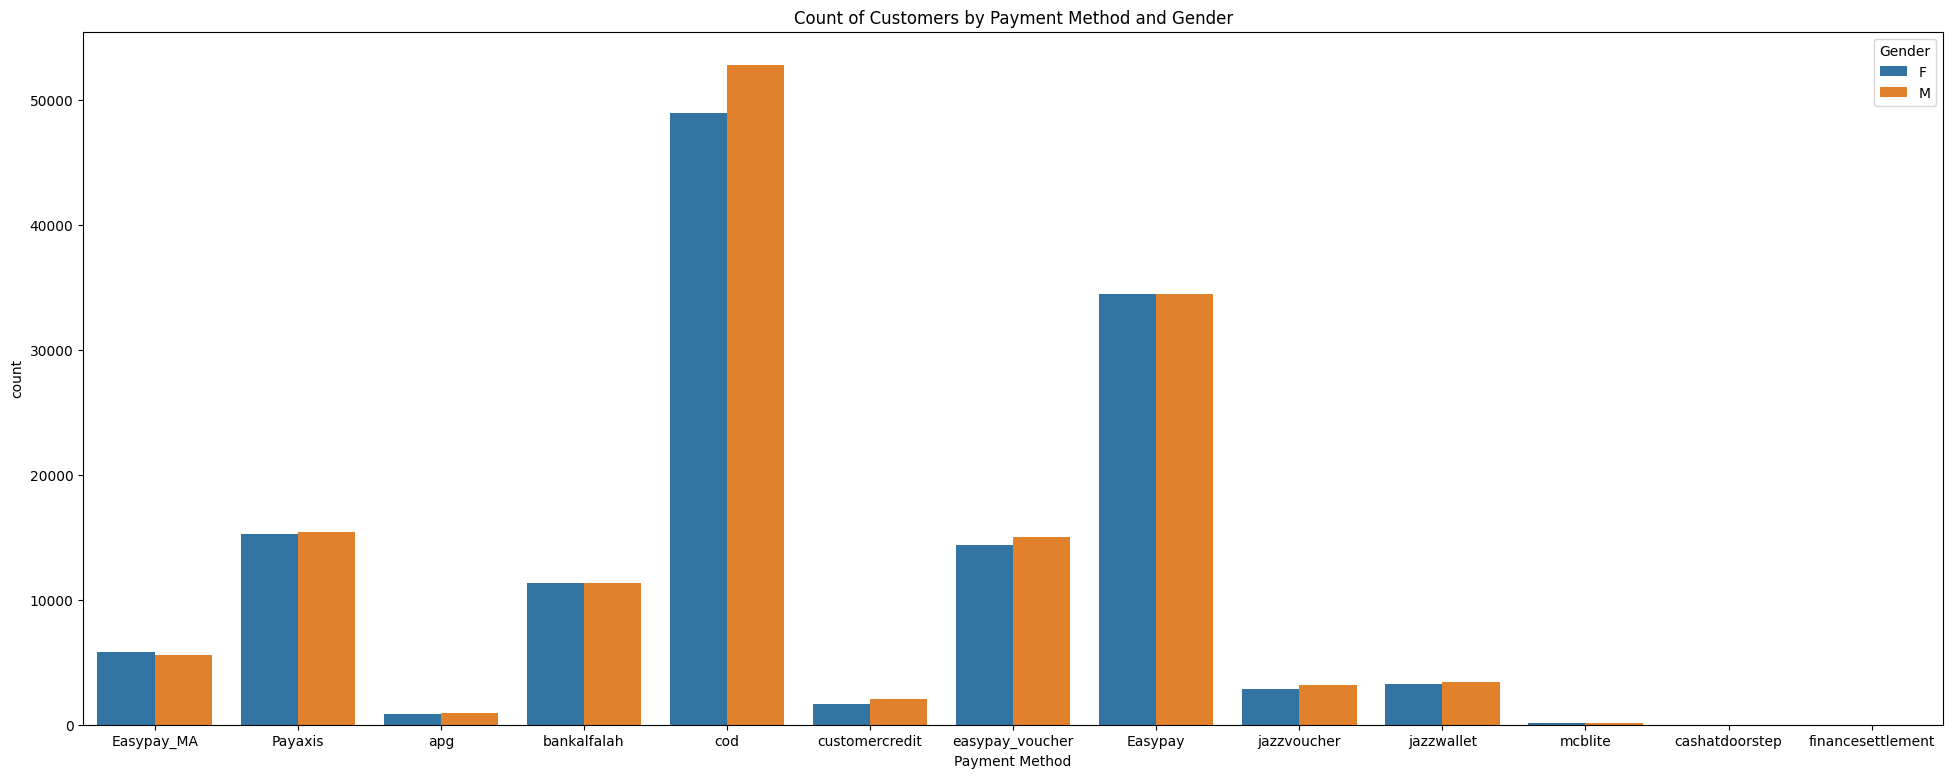

In [259]:
plt.figure(figsize=(24,9));
sns.countplot(x="Payment Method", hue="Gender", data=df)
plt.title("Count of Customers by Payment Method and Gender");

## The Chart revelead that Cod (Male were the highest compared to female) & Easypay(both Male & Female were at par) were the most prefered payment method.

## Gender by Region Spread.

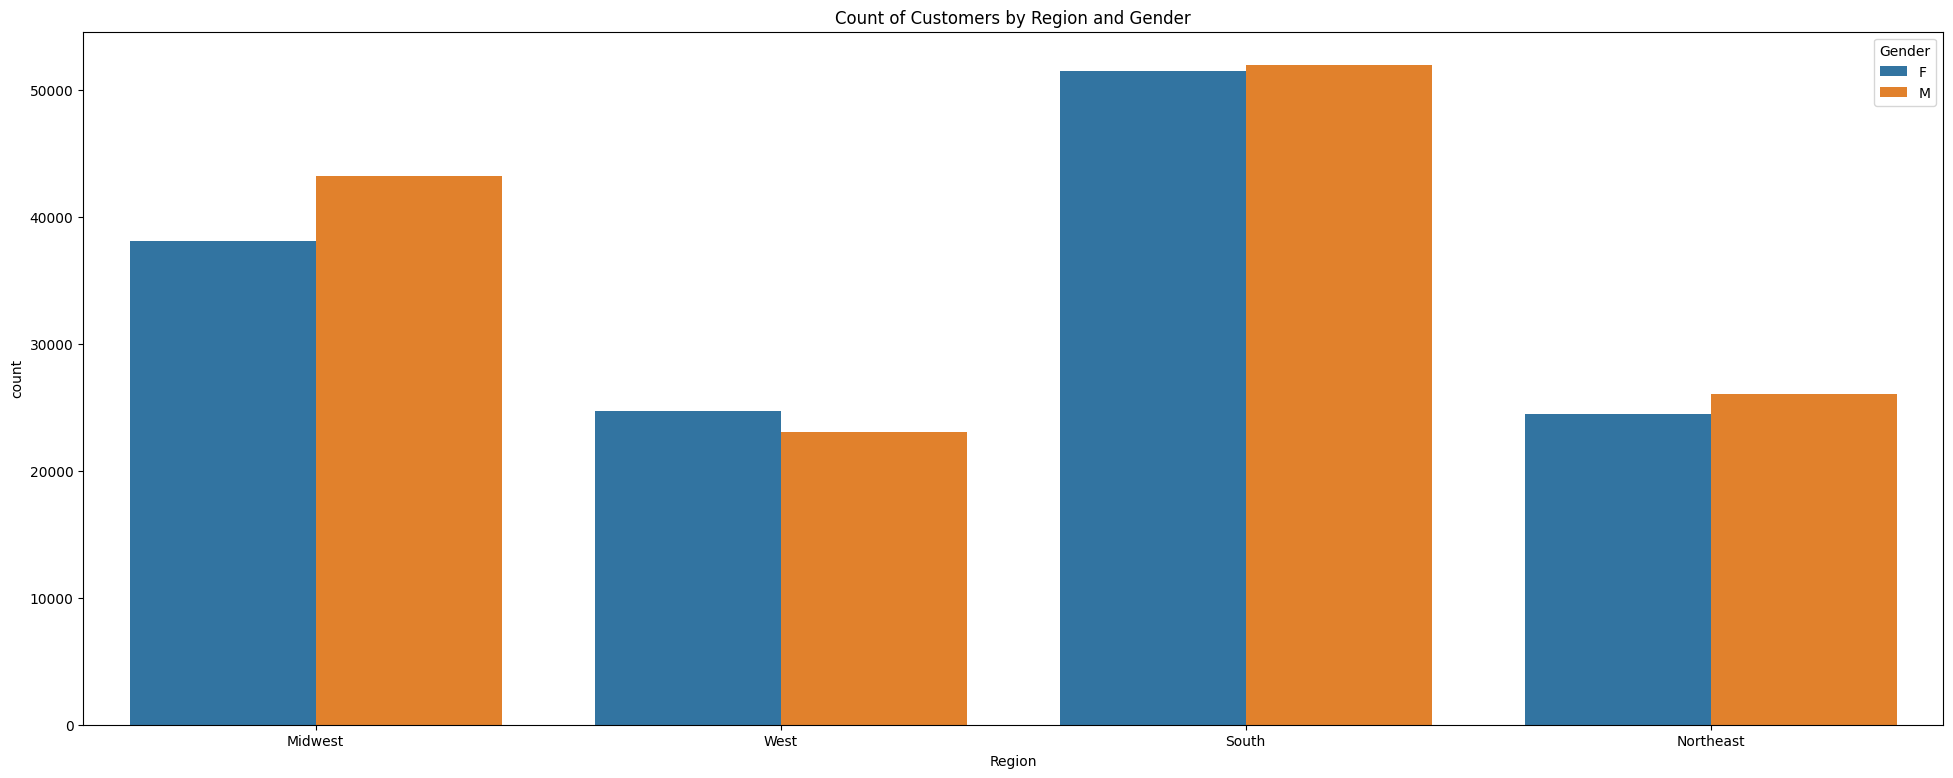

In [260]:
plt.figure(figsize=(24,9));
sns.countplot(x="Region", hue="Gender", data=df)
plt.title("Count of Customers by Region and Gender");

### Here the South region (Male was higher than the female) had the highest number of customers followed by the Midwest region.

## Category Distribution by Region.

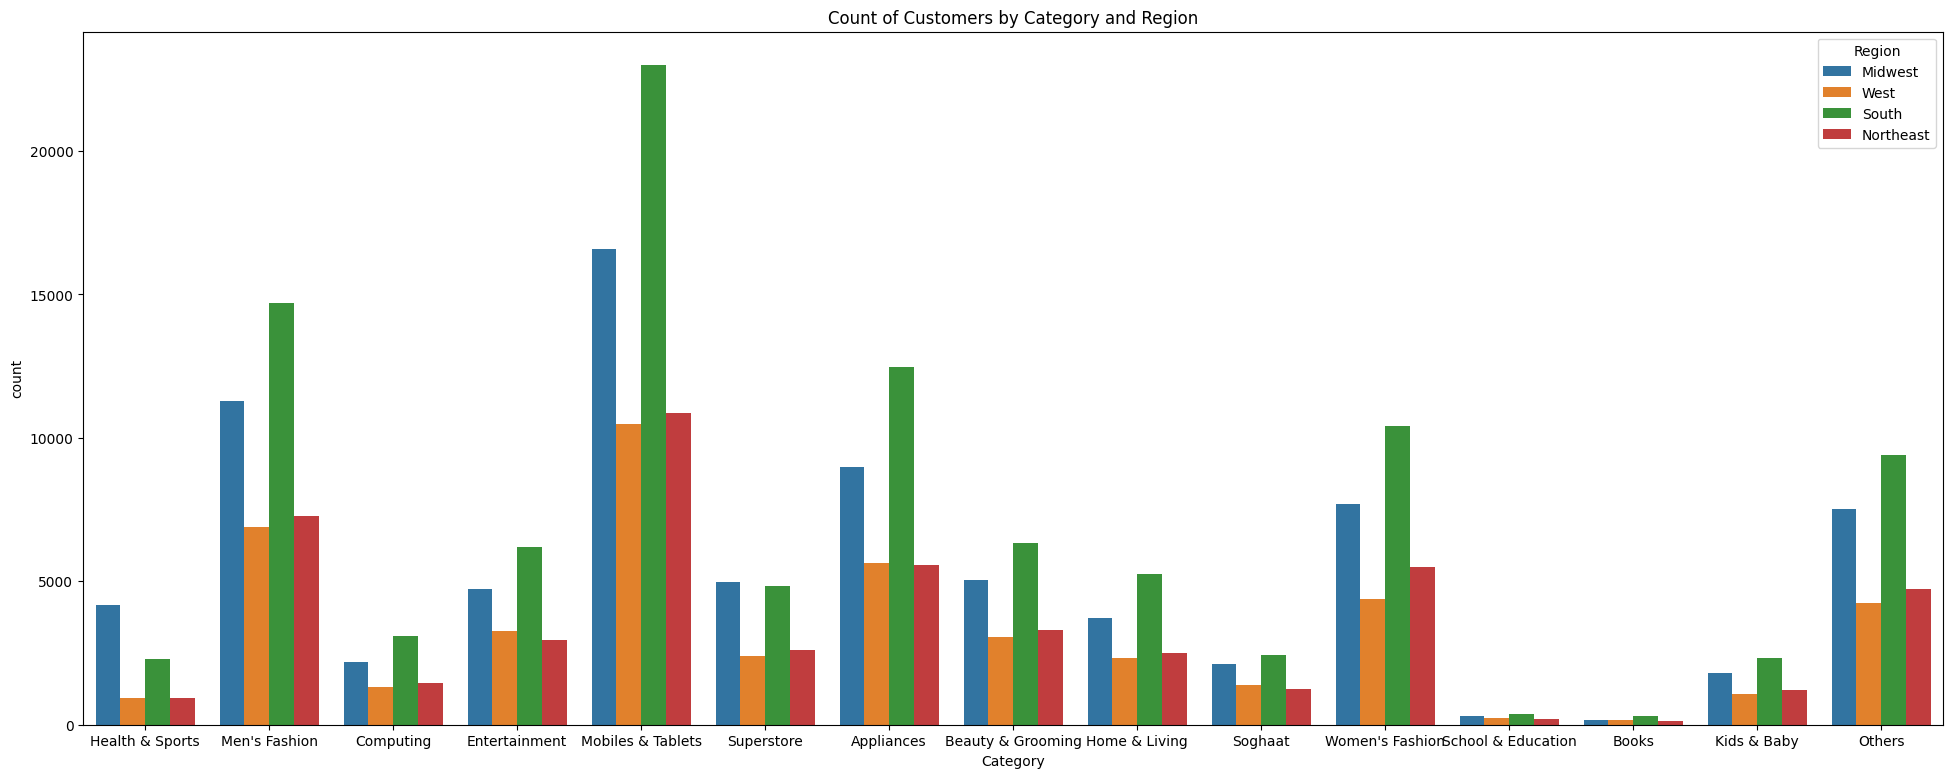

In [261]:
plt.figure(figsize=(24,9));
sns.countplot(x="Category", hue="Region", data=df)
plt.title("Count of Customers by Category and Region");

## Category by Gender

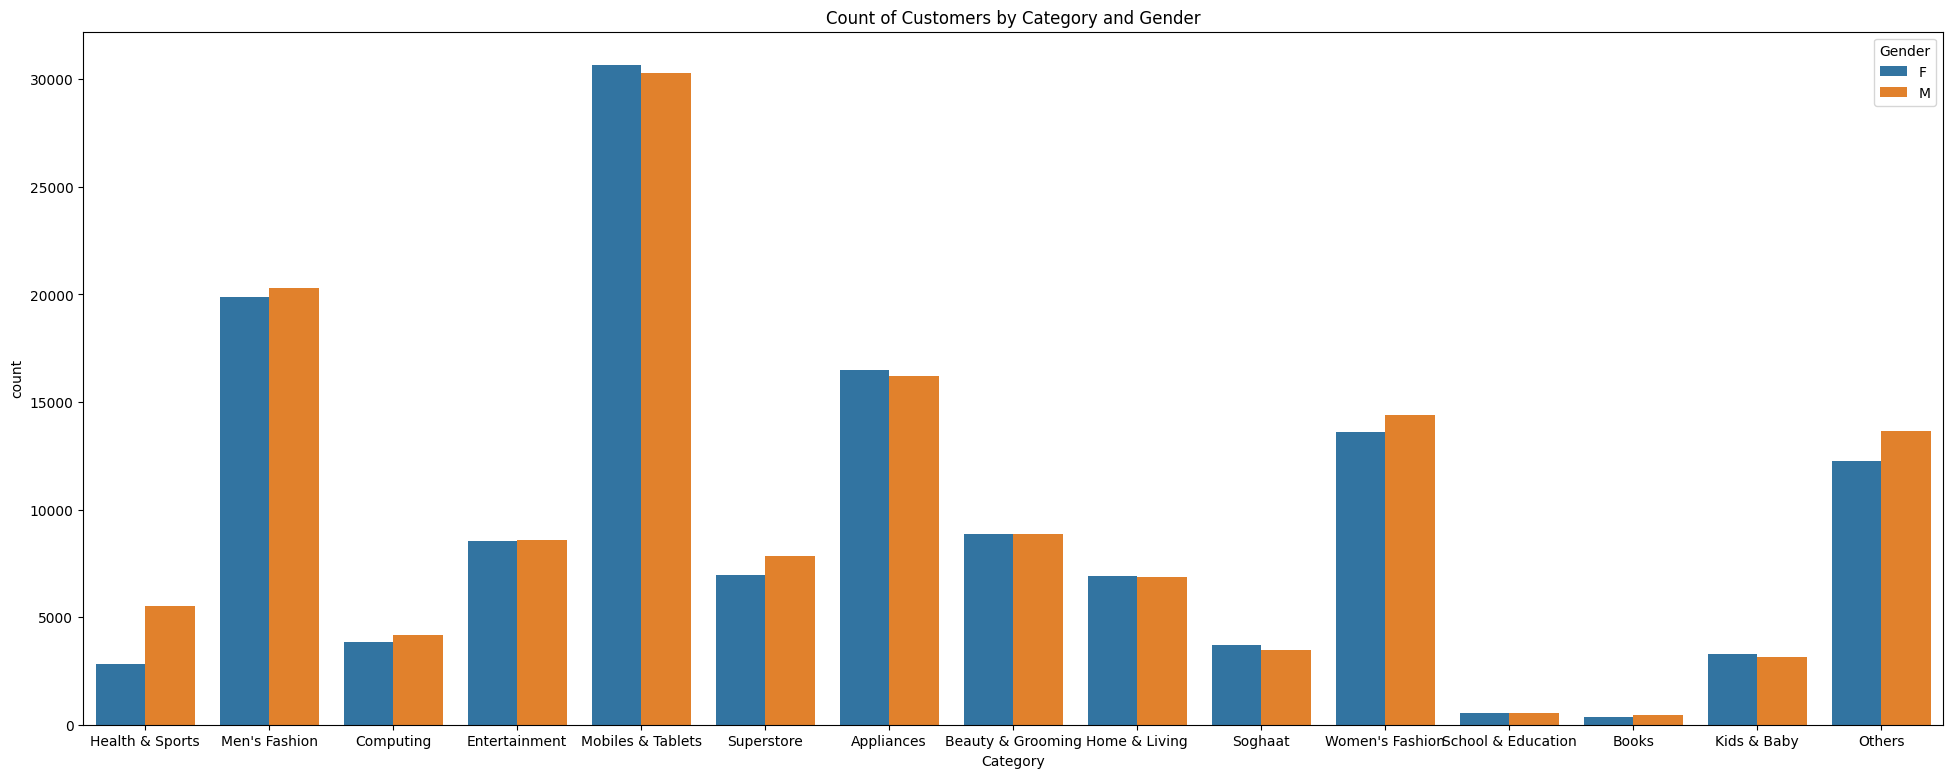

In [262]:
plt.figure(figsize=(24,9));
sns.countplot(x="Category", hue="Gender", data=df)
plt.title("Count of Customers by Category and Gender");

#### From the above chart we can see that Mobiles & Tablets were most purchased by females. Followed by the Men's Fashion were most purchased by Male.  The least purchased product were books and school & education products. This reveals that their customers are mostly Adults. 

## Payment Method Distribution by Region

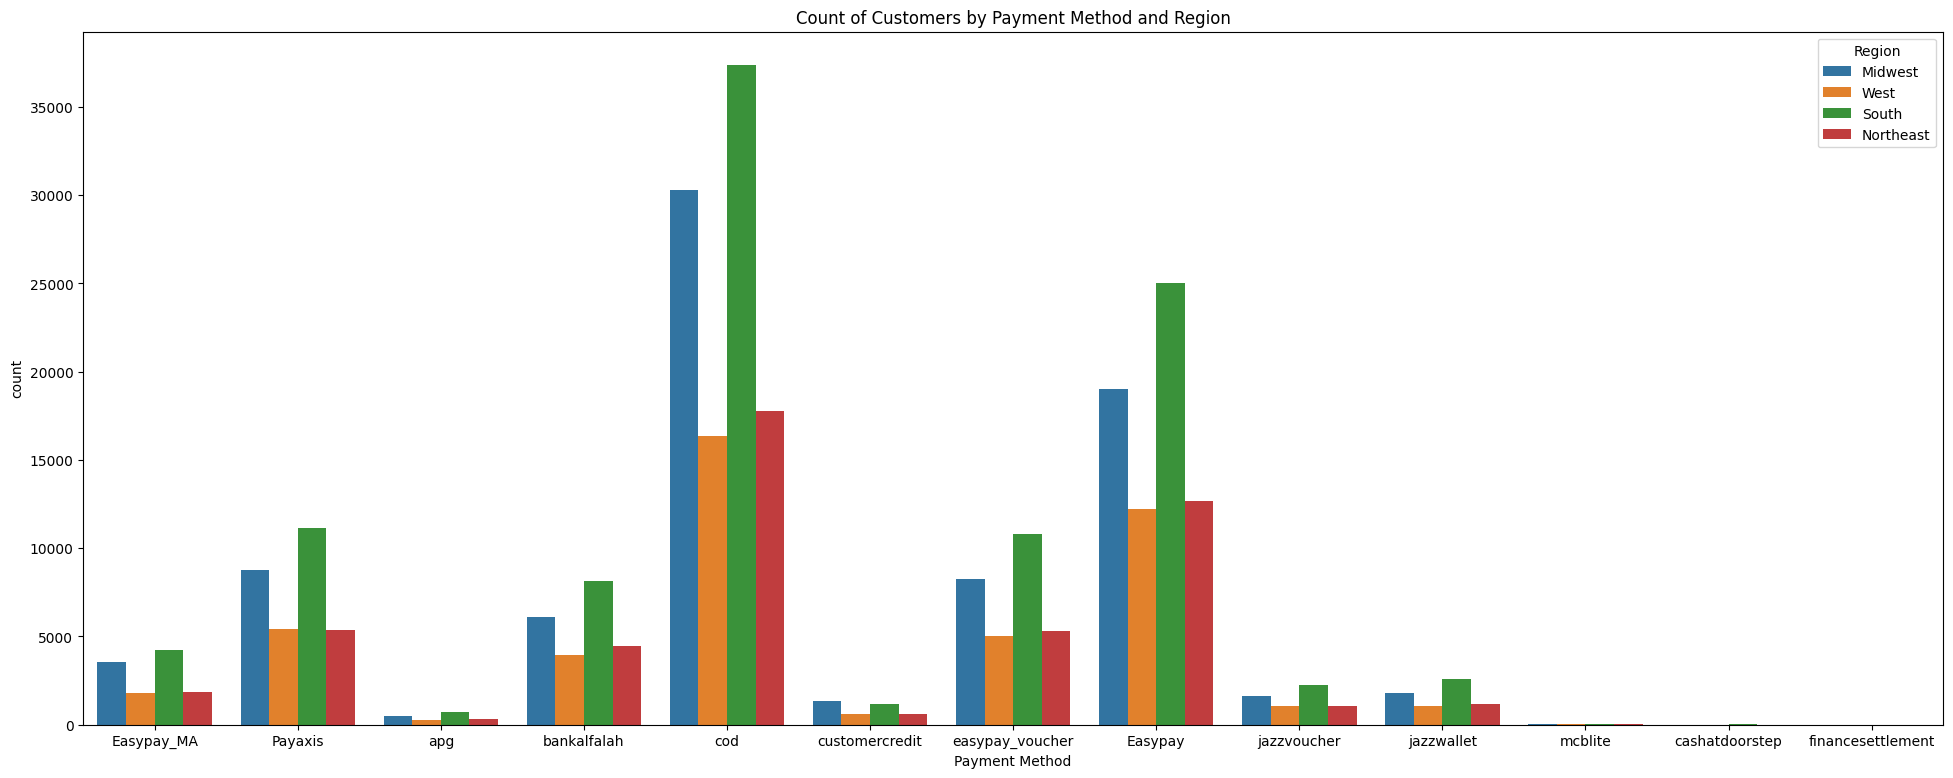

In [263]:
plt.figure(figsize=(24,9));
sns.countplot(x="Payment Method", hue="Region", data=df)
plt.title("Count of Customers by Payment Method and Region");
          

## Quantity Ordered by Gender

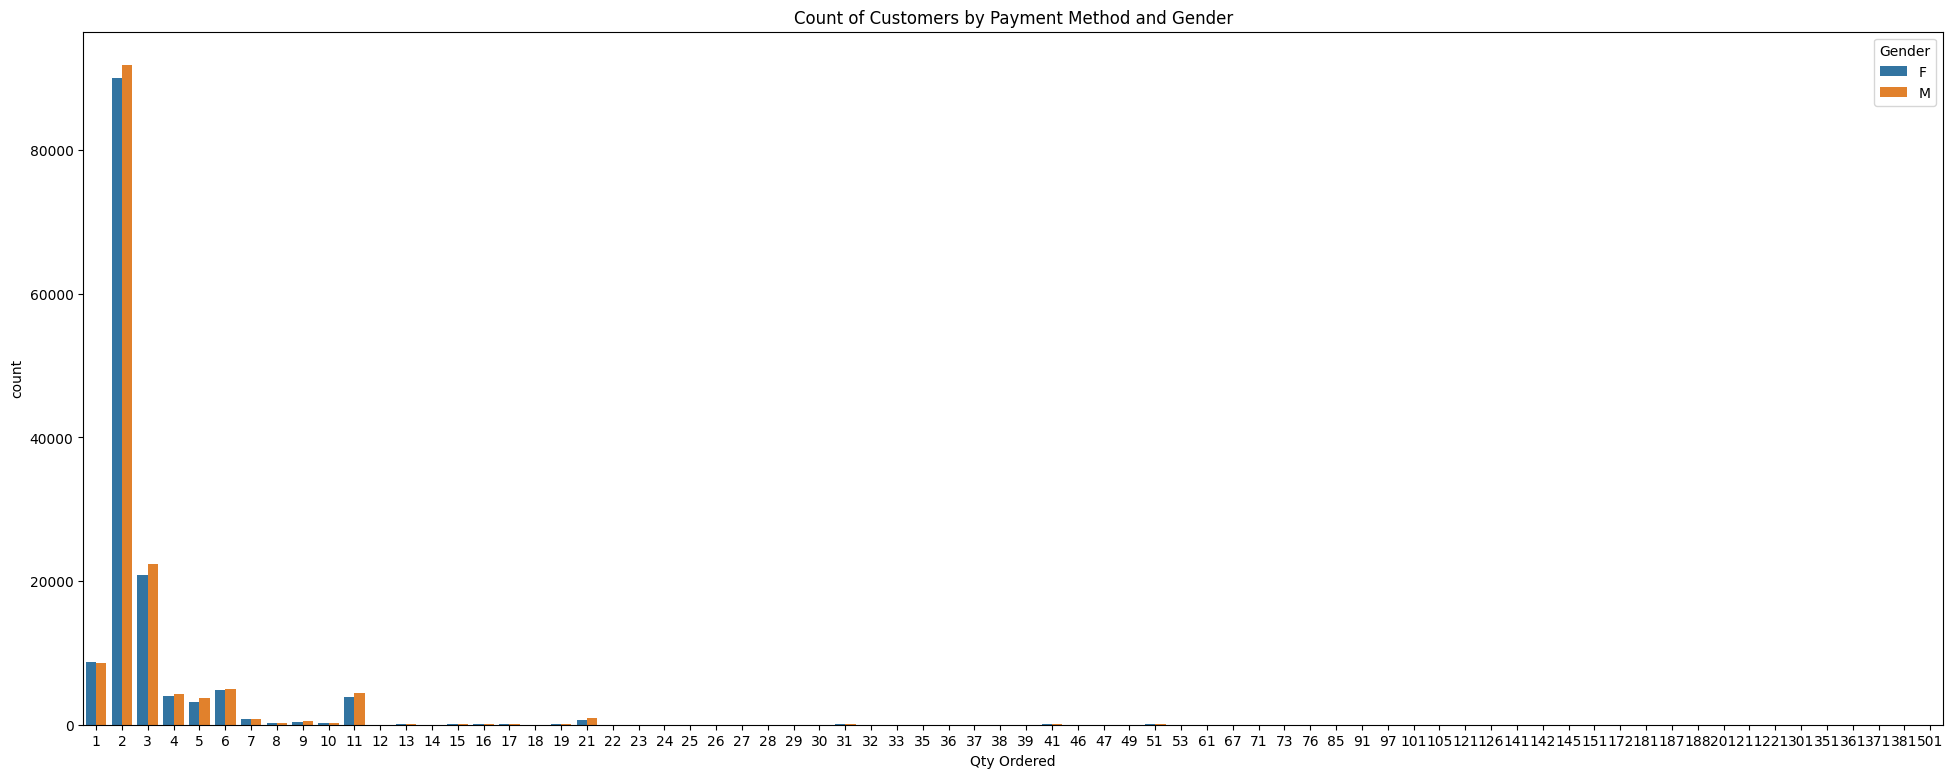

In [264]:
plt.figure(figsize=(24,9));
sns.countplot(x="Qty Ordered", hue="Gender", data=df)
plt.title("Count of Customers by Payment Method and Gender");

## Checking for correlation between the length of time a customer has been with Sterling and their spending.

### Scatter Plot

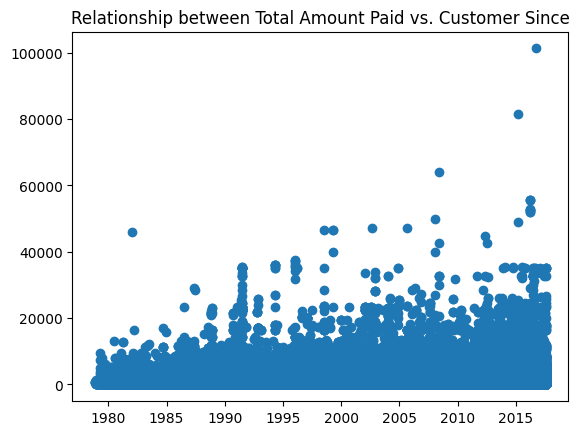

In [265]:
plt.title("Relationship between Total Amount Paid vs. Customer Since")
plt.scatter(x="Customer Since", y="Total", data=df)
plt.show()

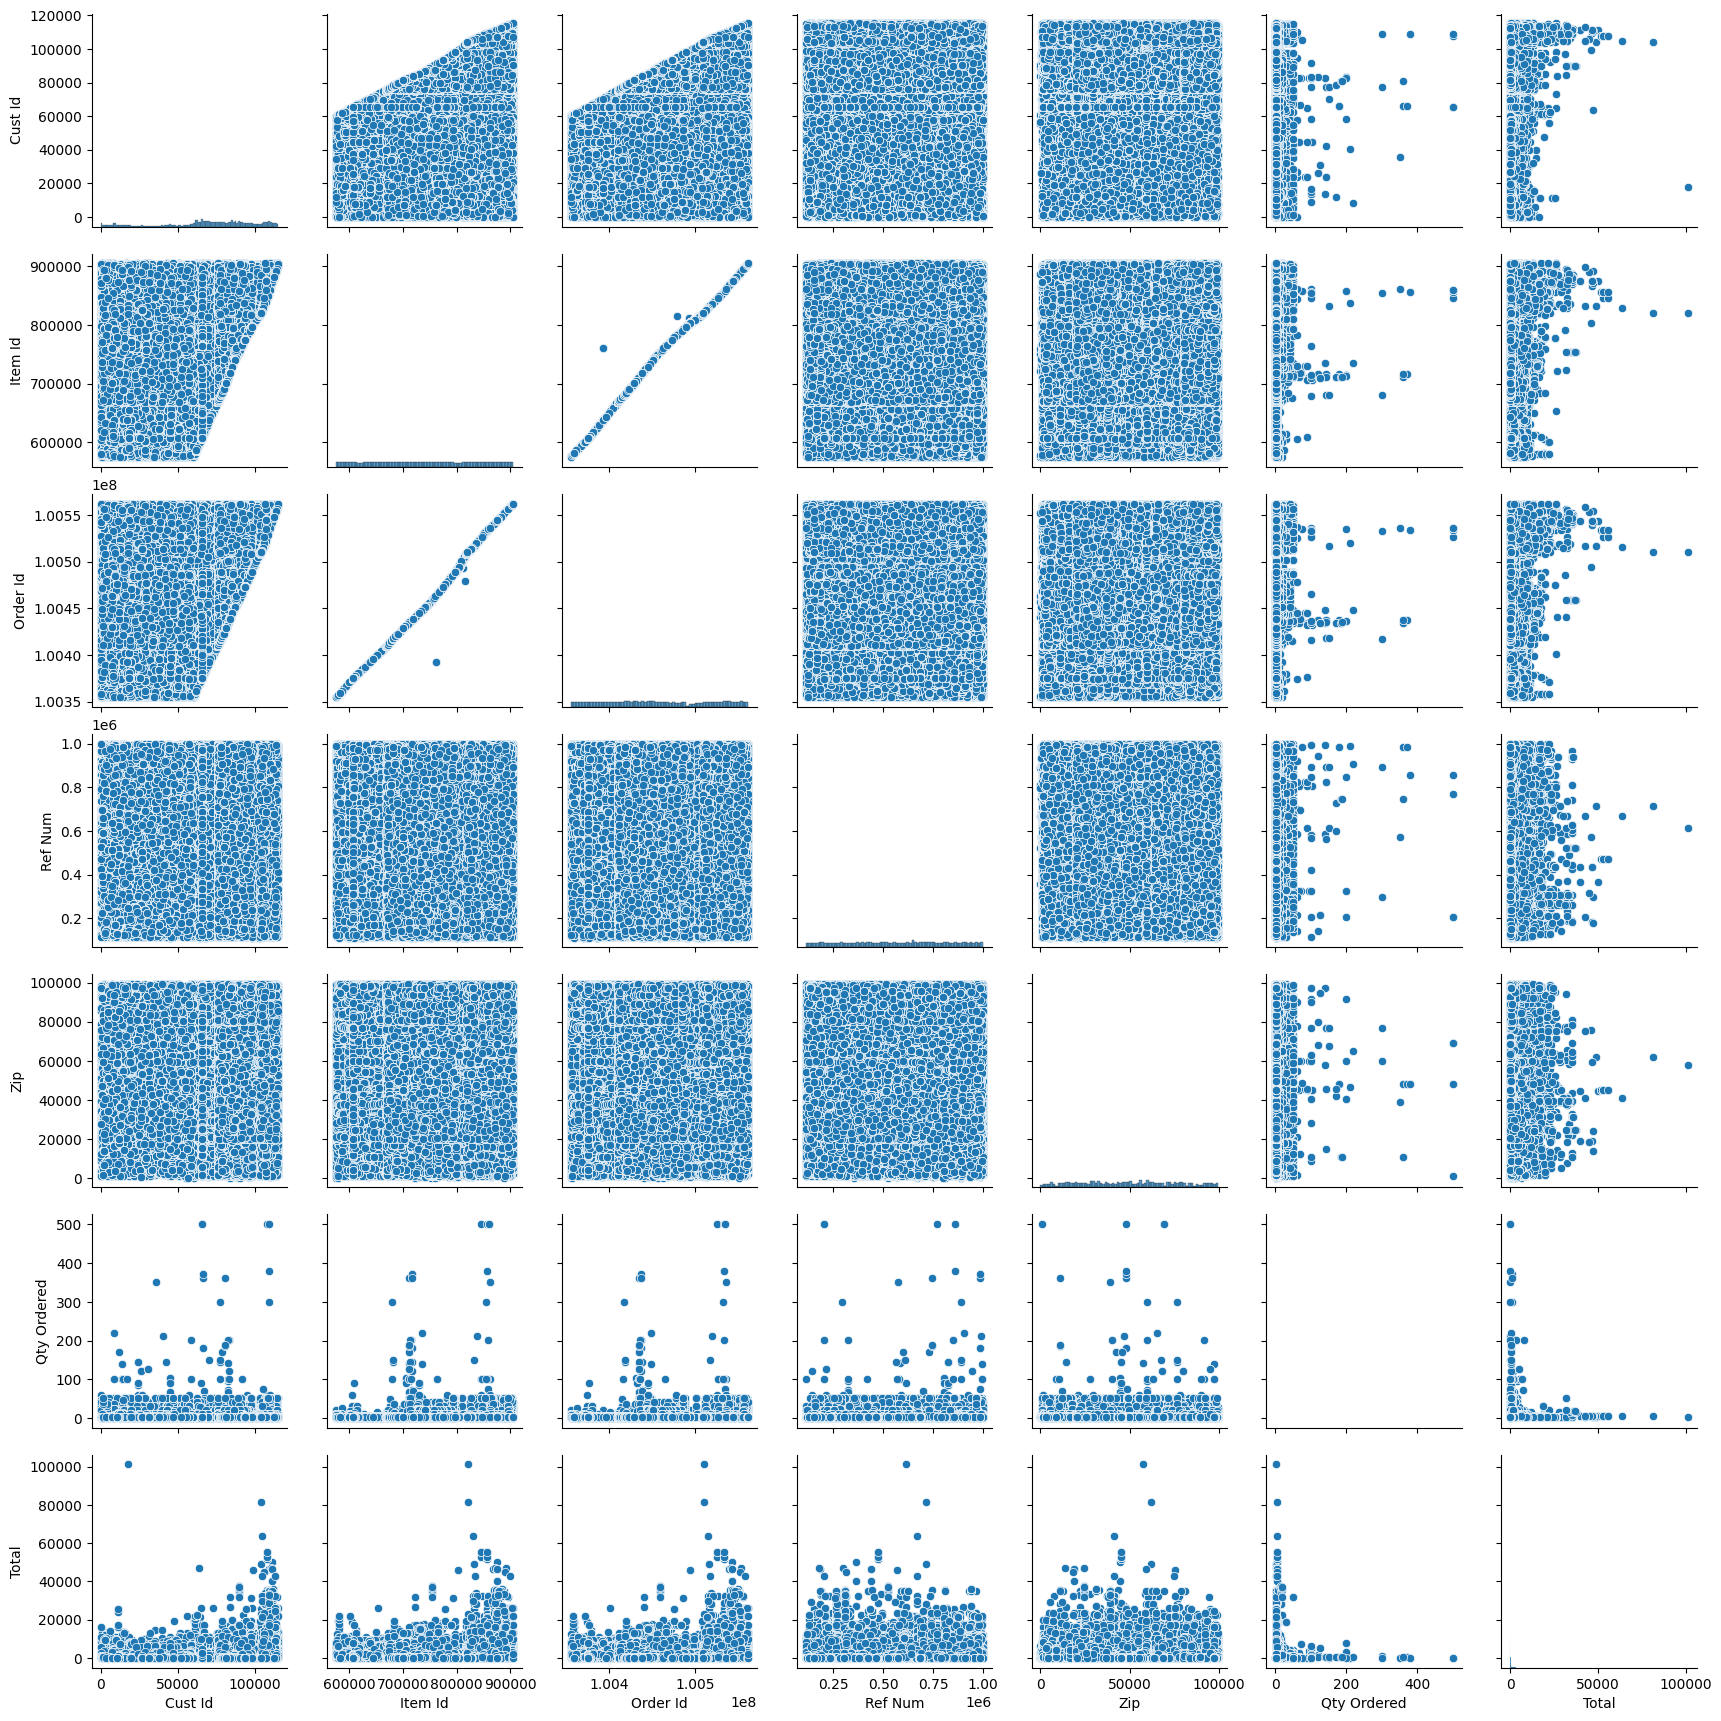

In [266]:
Lpairplot=sns.pairplot(df)

## MULTIVARIATE ANALYSIS

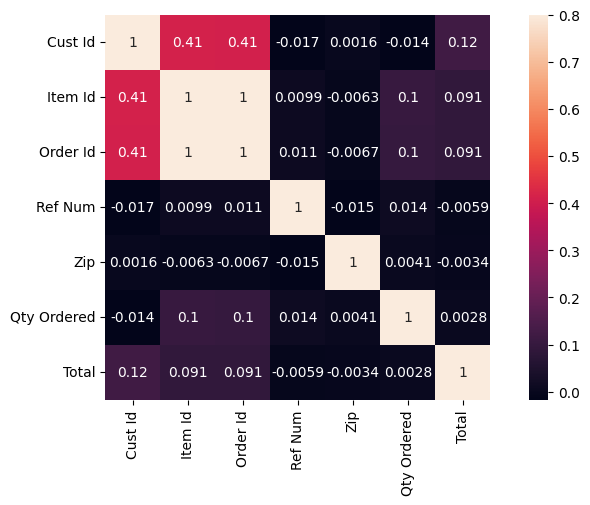

In [267]:
# Correlation check using the heat map
a = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(a, vmax=.8, square=True, annot=True);

#### There is a weak correlation among the variables.

In [268]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

## Comparing the Category with Total and Qty Ordered

In [269]:
cat=df.groupby("Category")[["Payment Method", "Qty Ordered","Total"]].sum().reset_index()
cat.head(3)
    

Category  Qty Ordered         Total
0         Appliances        81688  2.980577e+07
1  Beauty & Grooming        69981  2.617225e+06
2              Books         2131  3.224715e+04

In [270]:
cat=pd.melt(cat,id_vars="Category",var_name="Metric",value_name="Value")
cat.tail(3) # bottom rows


Category Metric         Value
27          Soghaat  Total  5.701138e+05
28       Superstore  Total  2.832845e+06
29  Women's Fashion  Total  6.587294e+06

In [271]:
cat.head(3) #first three rows

Category       Metric    Value
0         Appliances  Qty Ordered  81688.0
1  Beauty & Grooming  Qty Ordered  69981.0
2              Books  Qty Ordered   2131.0

<AxesSubplot:title={'center':'Category against Qty Ordered and Total'}, xlabel='Category', ylabel='Value'>

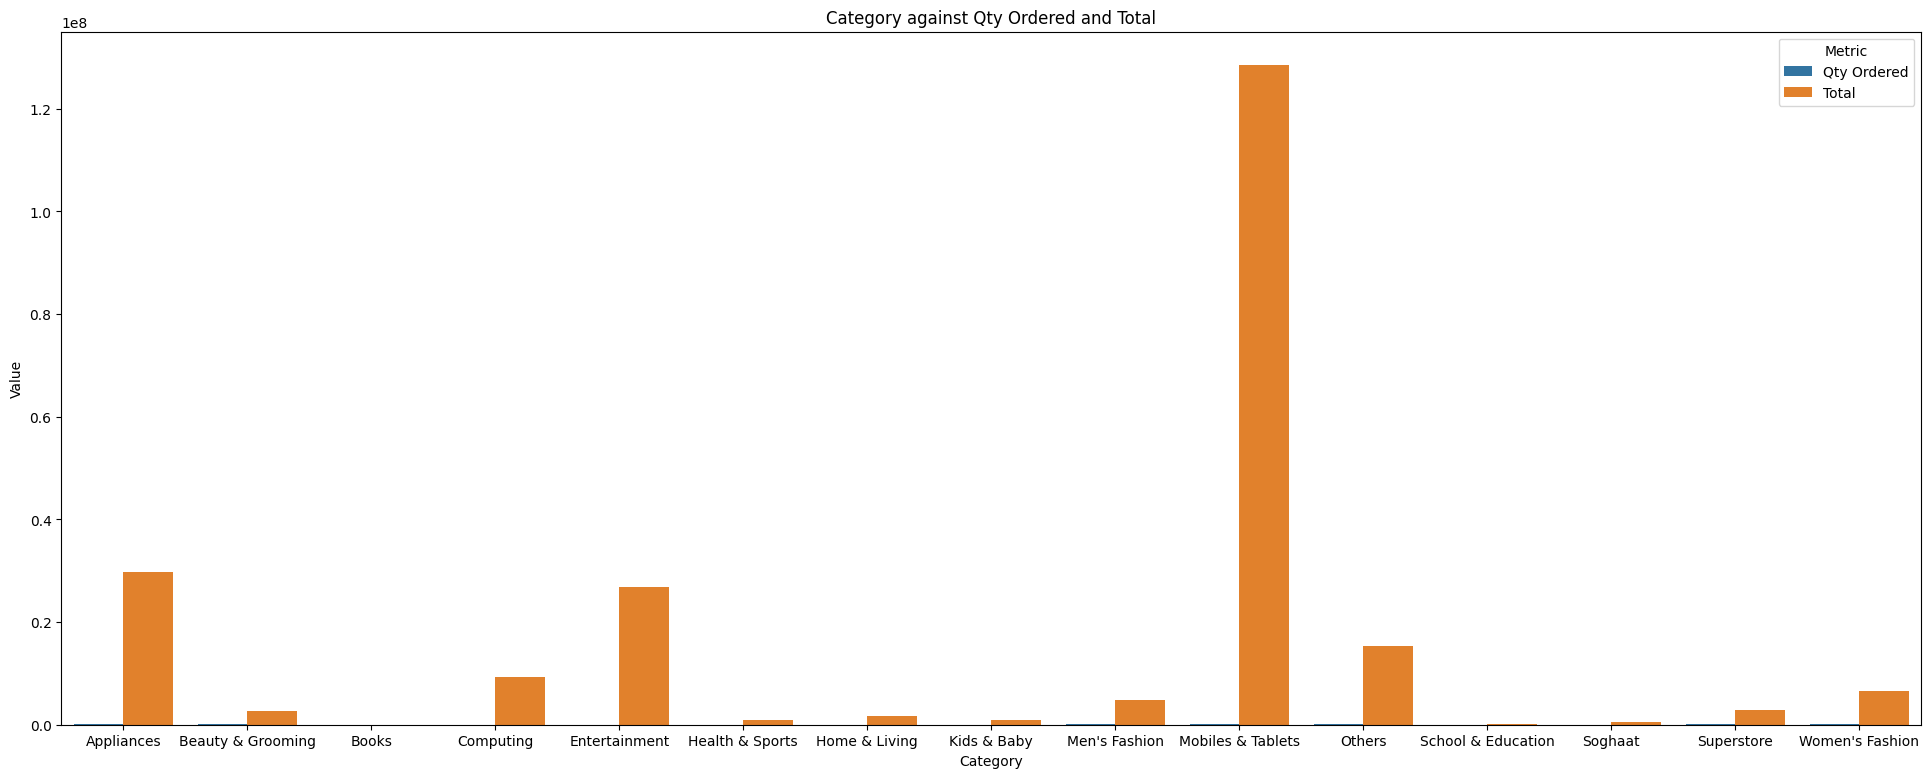

In [272]:
plt.figure(figsize=(24,9));
plt.title("Category against Qty Ordered and Total" )
sns.barplot(data=cat, x="Category", y="Value", hue="Metric")


## Comparing the Payment Method with Total and Qty Ordered

In [273]:
pymt=df.groupby("Payment Method")[["Qty Ordered","Total"]].sum().reset_index()
pymt.head(3)

Payment Method  Qty Ordered         Total
0        Easypay       230689  5.418908e+07
1     Easypay_MA        36176  6.662707e+06
2        Payaxis       116457  3.759357e+07

In [274]:
pymt=pd.melt(pymt, id_vars="Payment Method", var_name="Metric", value_name="Value")
pymt.tail(3) # bottom rows

Payment Method Metric        Value
23    jazzvoucher  Total  5481296.209
24     jazzwallet  Total  2498594.568
25        mcblite  Total   163340.800

<AxesSubplot:title={'center':'Payment Method against Qty Ordered and Total'}, xlabel='Payment Method', ylabel='Value'>

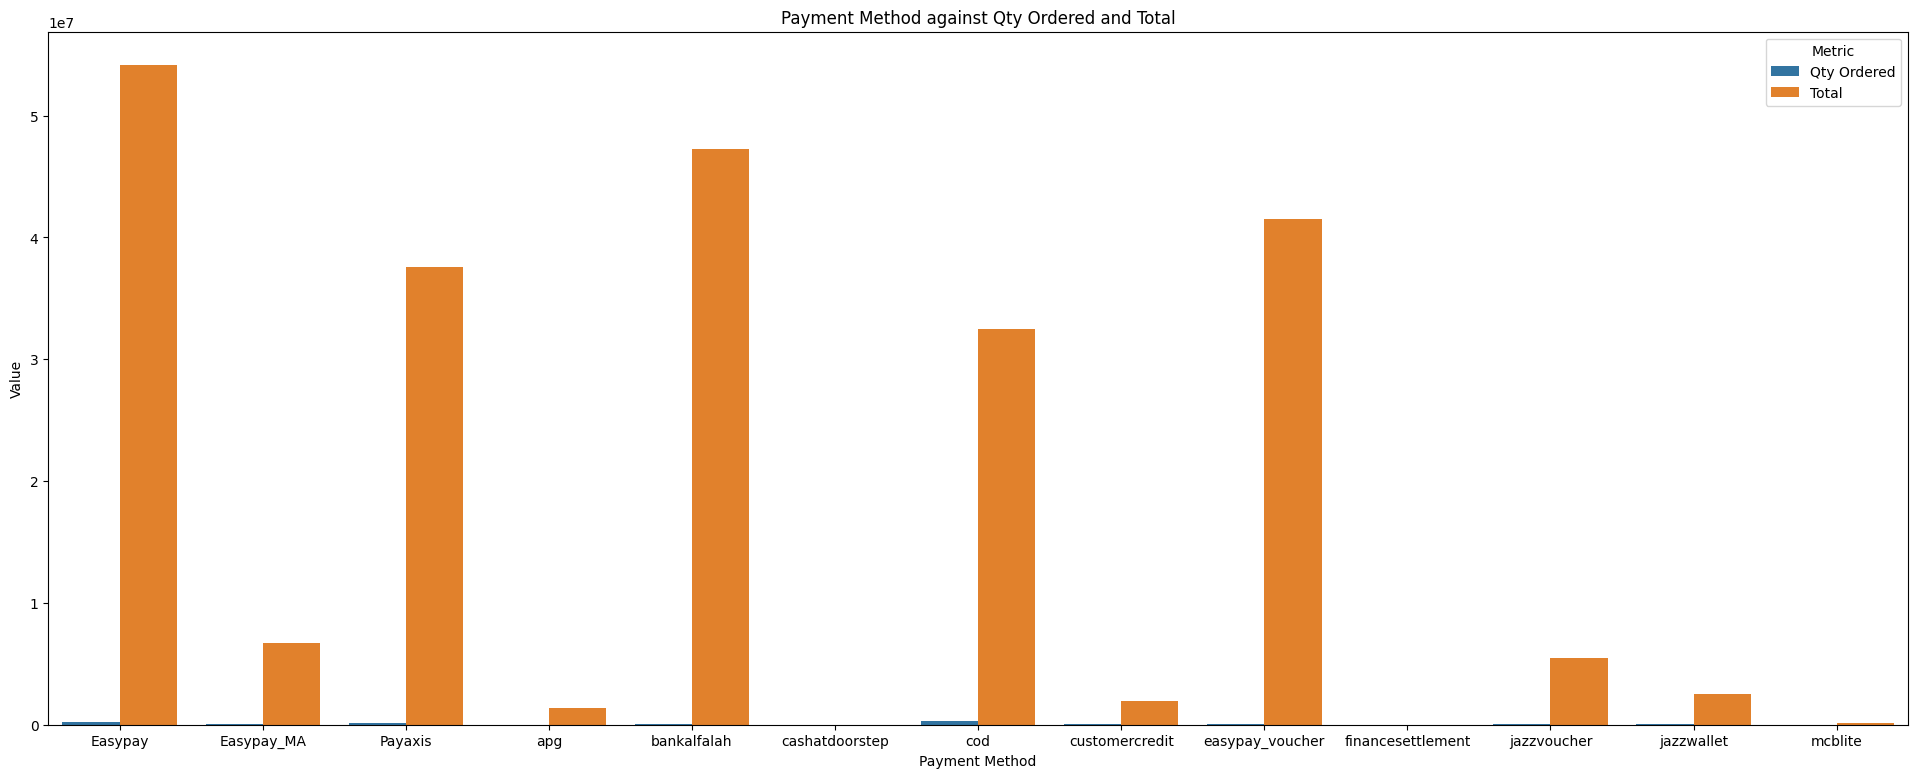

In [275]:
plt.figure(figsize=(24,9));
plt.title("Payment Method against Qty Ordered and Total" )
sns.barplot(data=pymt, x="Payment Method", y="Value", hue="Metric")

In [276]:
df.columns

Index(['Category', 'City', 'County', 'Cust Id', 'Customer Since',
       'Date of Order', 'Full Name', 'Gender', 'Item Id', 'Order Id',
       'Payment Method', 'Place Name', 'Ref Num', 'Region', 'State',
       'User Name', 'Zip', 'Qty Ordered', 'Total'],
      dtype='object')

In [277]:
gen=df.groupby("Gender")[["Qty Ordered", "Total"]].sum().reset_index()
gen.head(3)

Gender  Qty Ordered         Total
0      F       407655  1.157065e+08
1      M       443911  1.153510e+08

In [278]:
gen=pd.melt(gen, id_vars="Gender", var_name="Metric", value_name="Value") # to transpose the data use pd.melt
gen.tail(3) # bottom rows

Gender       Metric         Value
1      M  Qty Ordered  4.439110e+05
2      F        Total  1.157065e+08
3      M        Total  1.153510e+08

<AxesSubplot:title={'center':'Gender against Qty Ordered and Total'}, xlabel='Gender', ylabel='Value'>

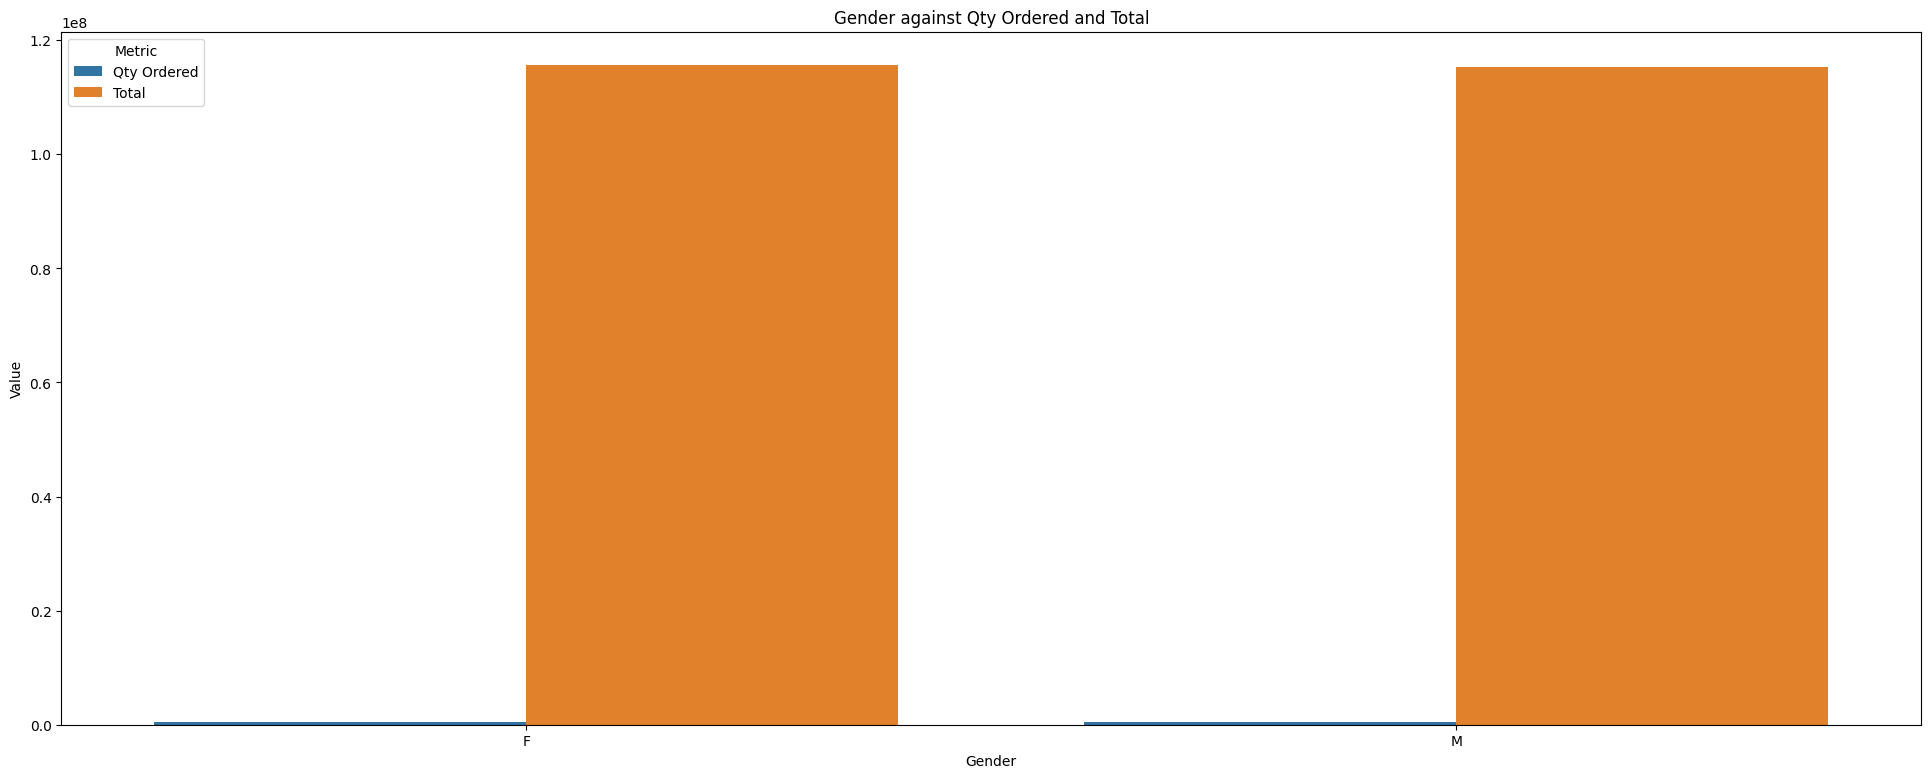

In [279]:
plt.figure(figsize=(24,9));
plt.title("Gender against Qty Ordered and Total")
sns.barplot(data=gen, x="Gender", y="Value", hue="Metric")

## TIME SERIES ANALYSIS


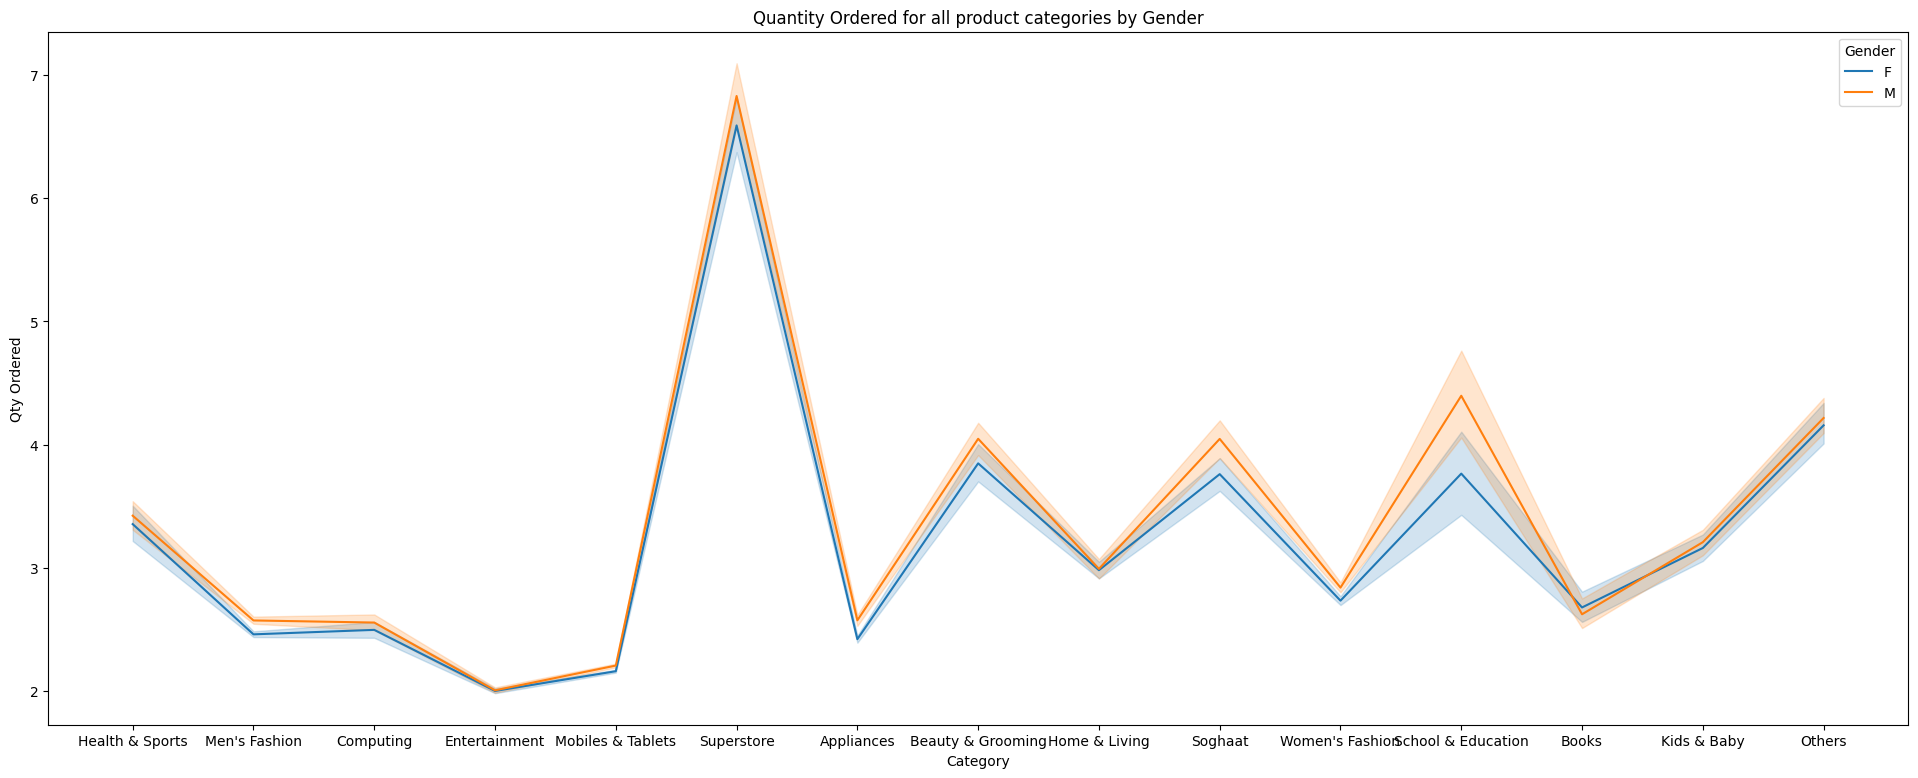

In [280]:
plt.figure(figsize=(24,9))
sns.lineplot(x="Category", y="Qty Ordered", data=df, hue="Gender")
plt.title("Quantity Ordered for all product categories by Gender");

Superstore had the highest quantity of goods ordered by more males.
The least quantity of goods were ordered from entertainment by the males.

plt.figure(figsize=(24,9))
sns.lineplot(x="Payment Method", y="Total", data=df, hue="Gender")
plt.title("Total for all Payment Method by Gender");

No much difference in ordering patterns between both genders

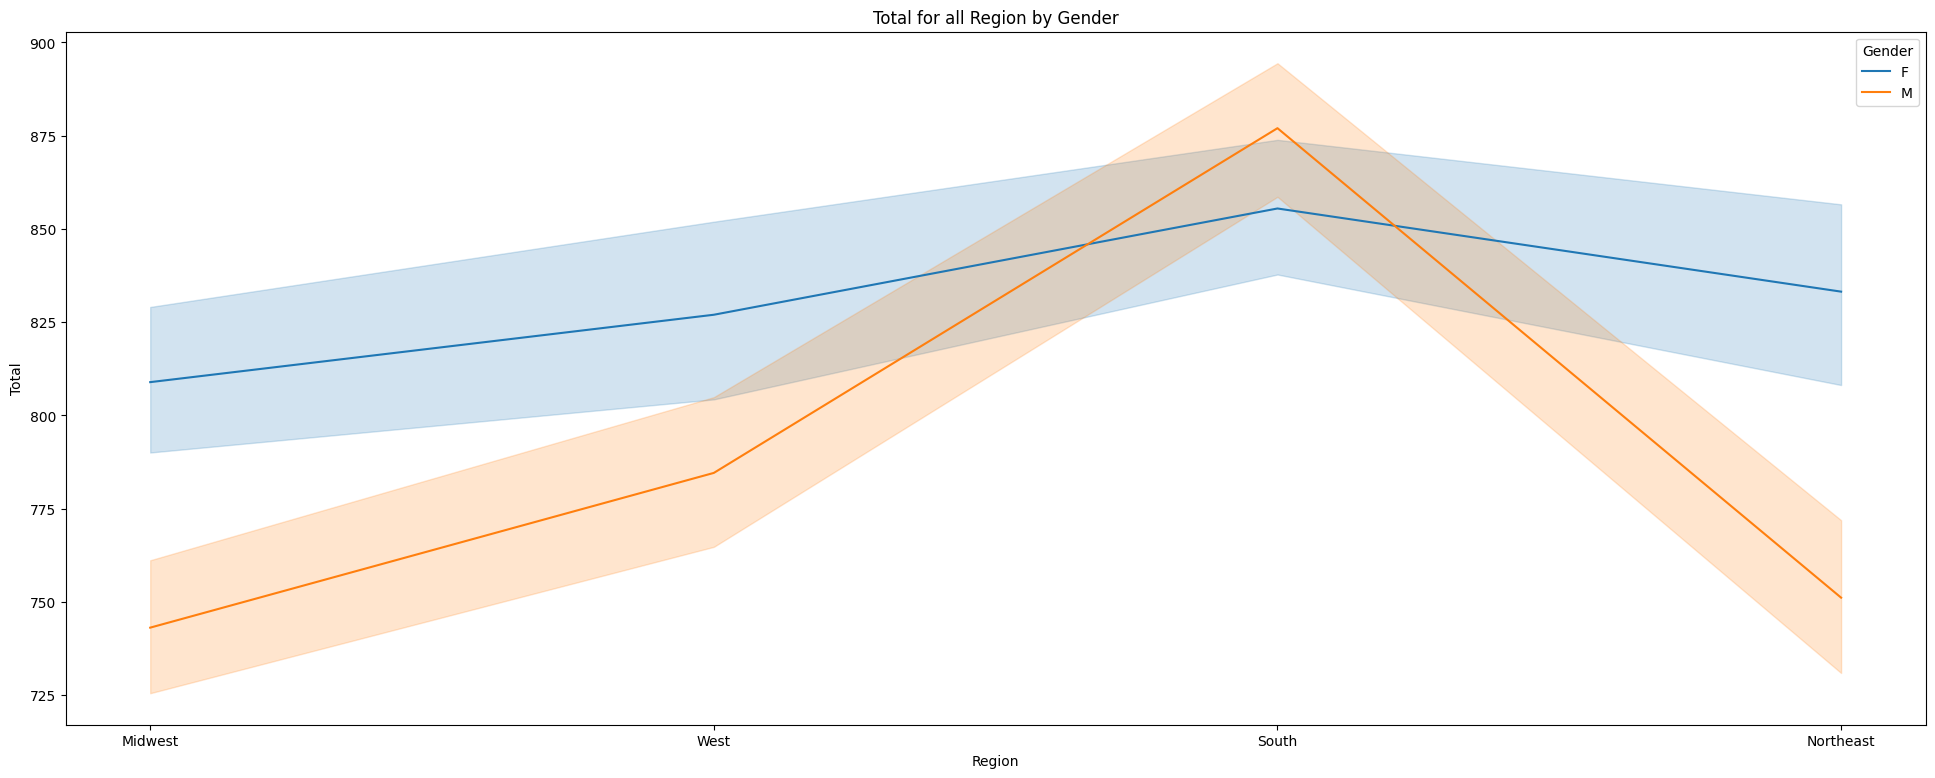

In [281]:
plt.figure(figsize=(24,9))
sns.lineplot(x="Region", y="Total", data=df, hue="Gender")
plt.title("Total for all Region by Gender");

The females in the South region made the highest amount of payment.
The males in the Mideast region paid the least amount.

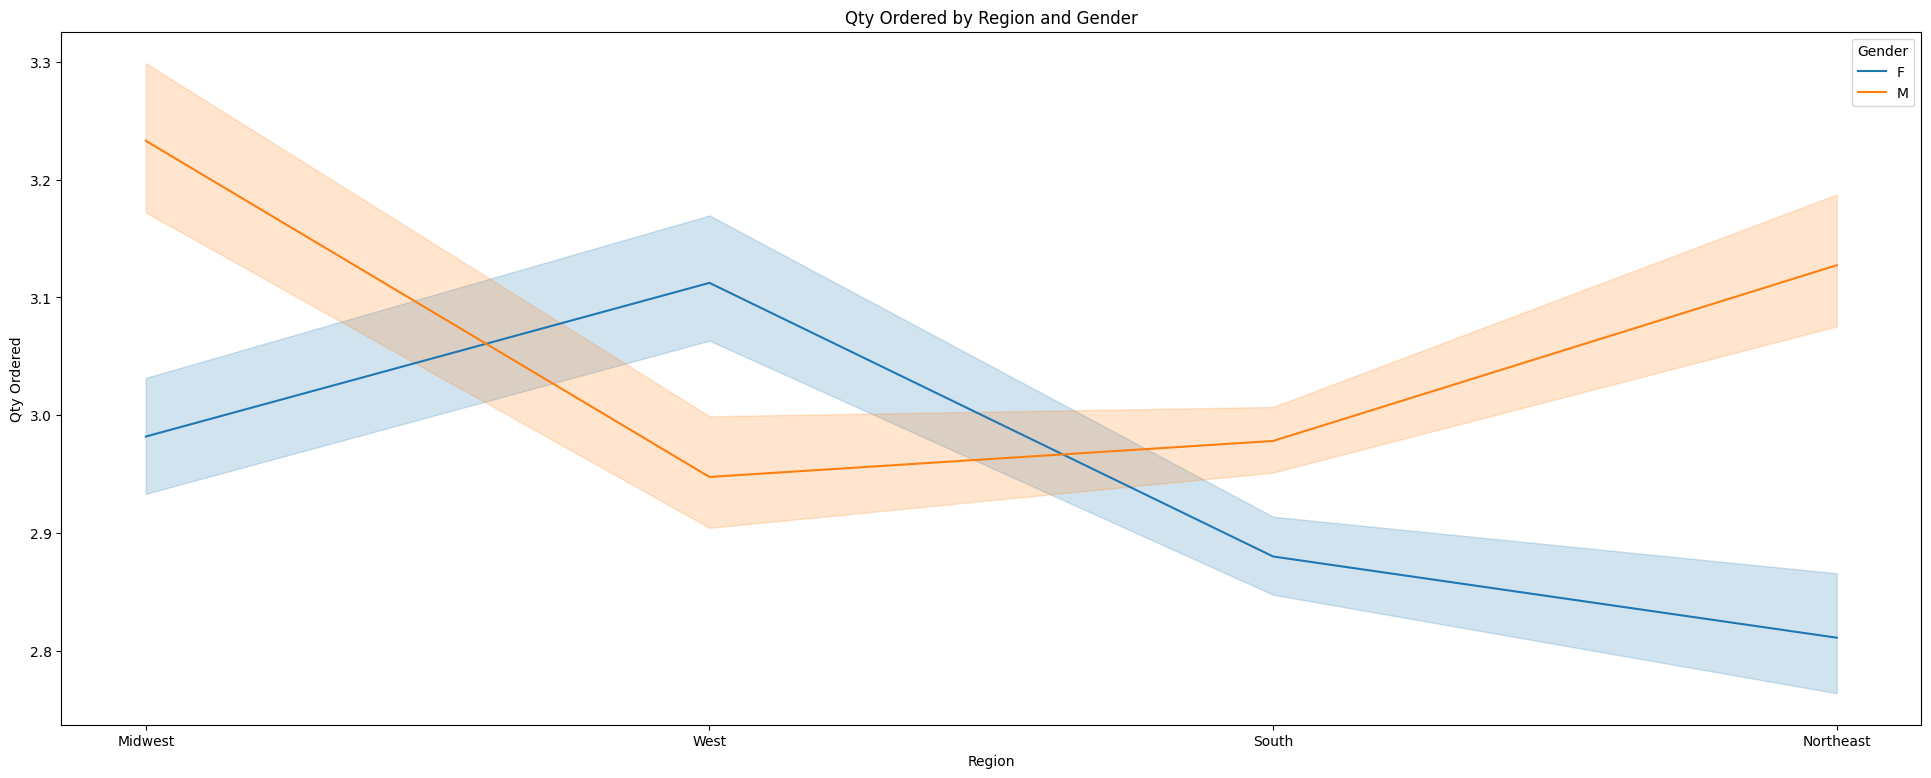

In [282]:
plt.figure(figsize=(24,9))
sns.lineplot(x="Region", y="Qty Ordered", data=df, hue="Gender")
plt.title("Qty Ordered by Region and Gender");

i. The males in the midwest region placed the highest orders.
ii. The females in the northeast region place the least orders.

In [283]:
# Extract the Year, Month, Quarter
df["year"] = df["Date of Order"].dt.year
df["month"] = df["Date of Order"].dt.month
df["month_name"] = df["Date of Order"].dt.month_name()
df["quarter"] = df["Date of Order"].dt.quarter
df.head(2)

Category        City     County  Cust Id Customer Since  \
0  Health & Sports        Bode   Humboldt   112285     2008-02-11   
1    Men's Fashion  Belleville  St. Clair   112386     2005-06-23   

  Date of Order       Full Name Gender  Item Id     Order Id  ...   Region  \
0    2022-08-07  Renaud, Maudie      F   880913  100547952.0  ...  Midwest   
1    2022-08-08  Shimp, Mariela      F   881493  100548328.0  ...  Midwest   

  State  User Name    Zip Qty Ordered Total  year  month  month_name  quarter  
0    IA   mcrenaud  50519           3  32.0  2022      8      August        3  
1    IL    mgshimp  62223           2  74.8  2022      8      August        3  

[2 rows x 23 columns]

Analyzing Quantity Ordered by Category

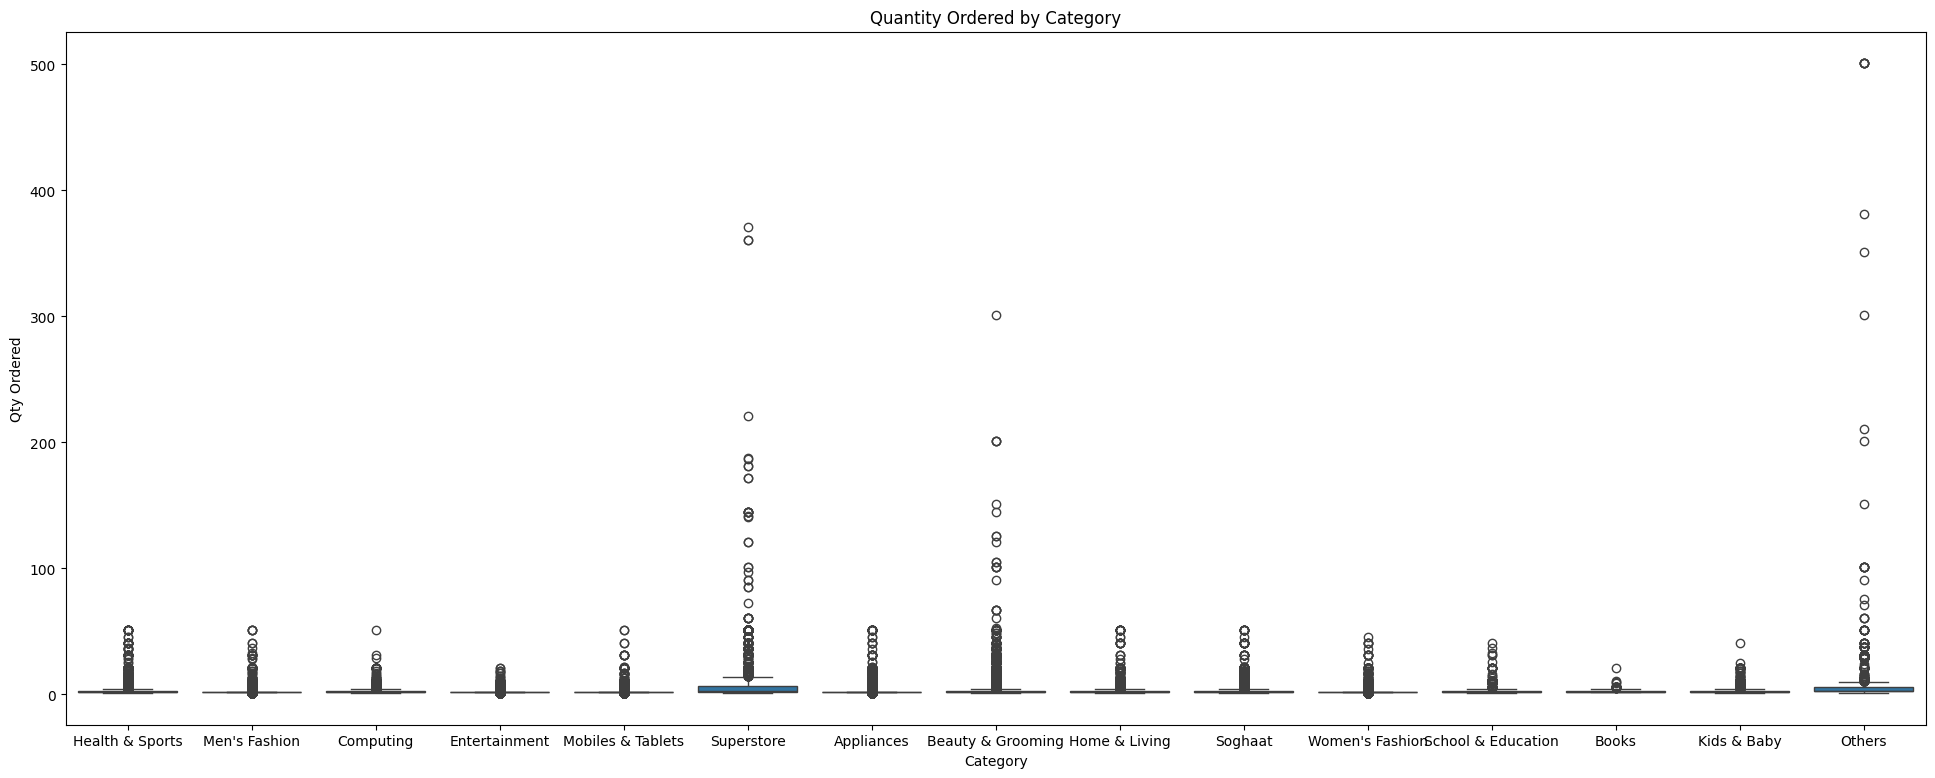

In [284]:
plt.figure(figsize=(24,9))
sns.boxplot(x='Category', y='Qty Ordered', data=df)
plt.title("Quantity Ordered by Category");

Although the data set is very large leading to a stretched box plot, outliers can be easily identified for some of the category of goods

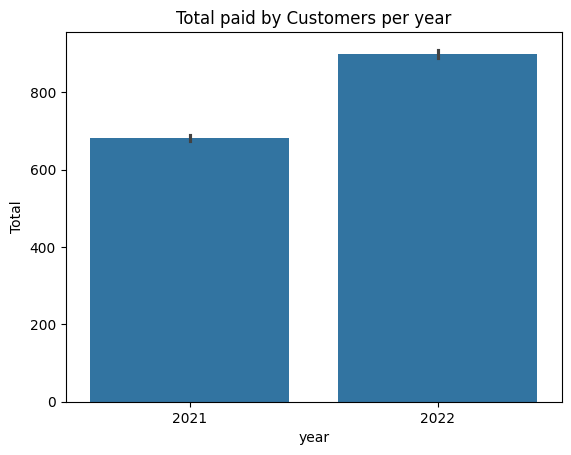

In [285]:
sns.barplot(x="year", data=df, y="Total")
plt.title("Total paid by Customers per year");

Customers paid more in 2022 than 2021.

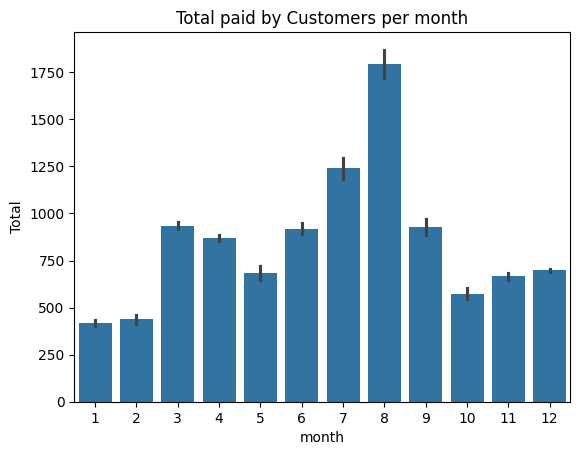

In [286]:
sns.barplot(x="month", data=df, y="Total")

plt.title("Total paid by Customers per month");

Peak sales are in August and least sales are in January.

In [287]:
df.head(4) #first 4 rows

Category           City     County  Cust Id Customer Since  \
0  Health & Sports           Bode   Humboldt   112285     2008-02-11   
1    Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
2    Men's Fashion     Belleville  St. Clair   112386     2005-06-23   
3        Computing  Young America     Carver   112501     2013-09-15   

  Date of Order        Full Name Gender  Item Id     Order Id  ...   Region  \
0    2022-08-07   Renaud, Maudie      F   880913  100547952.0  ...  Midwest   
1    2022-08-08   Shimp, Mariela      F   881493  100548328.0  ...  Midwest   
2    2022-08-08   Shimp, Mariela      F   881492  100548328.0  ...  Midwest   
3    2022-08-18  Doiron, Latrina      F   886067  100551079.0  ...  Midwest   

  State  User Name    Zip Qty Ordered   Total  year  month  month_name  \
0    IA   mcrenaud  50519           3    32.0  2022      8      August   
1    IL    mgshimp  62223           2    74.8  2022      8      August   
2    IL    mgshimp  62223           2    74.9  2022      8      August   
3    MN   lmdoiron  55552           2  6822.9  2022      8      August   

   quarter  
0        3  
1        3  
2        3  
3        3  

[4 rows x 23 columns]

## Top 10 Customers

In [288]:
# Sort the dataset by 'PaymentAmount' in descending order
df.sort_values(by='Total', ascending=False, inplace=True)

# Select the top 10 customers
top_10_customers = df.head(10)

# Print the top 10 customers
top_10_customers

Category        City     County  Cust Id Customer Since  \
38265   Beauty & Grooming   Spearfish   Lawrence    17987     2016-09-09   
803     Mobiles & Tablets   Indianola  Vermilion   104056     2015-03-02   
249677  Mobiles & Tablets  East Point    Johnson   105009     2008-06-09   
221508  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   
221509  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   
221515  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   
221507  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   
221513  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   
221512  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   
221514  Mobiles & Tablets        Ross     Butler   107853     2016-03-07   

       Date of Order       Full Name Gender  Item Id     Order Id  ...  \
38265     2022-05-11   Davison, Jeff      M   821284  100510800.0  ...   
803       2022-05-11  Duby, Eustolia      F   821286  100510802.0  ...   
249677    2022-05-26      Lear, Elmo      M   829931  100515480.0  ...   
221508    2022-06-13    Hord, Adolfo      M   845407  100526153.0  ...   
221509    2022-06-13    Hord, Adolfo      M   845415  100526159.0  ...   
221515    2022-06-25    Hord, Adolfo      M   856088  100533797.0  ...   
221507    2022-06-13    Hord, Adolfo      M   845333  100526104.0  ...   
221513    2022-06-25    Hord, Adolfo      M   856288  100533912.0  ...   
221512    2022-06-25    Hord, Adolfo      M   856083  100533792.0  ...   
221514    2022-06-25    Hord, Adolfo      M   856292  100533915.0  ...   

         Region State  User Name    Zip Qty Ordered      Total  year  month  \
38265   Midwest    SD  jmdavison  57783           2  101262.59  2022      5   
803     Midwest    IL     epduby  61850           6   81500.00  2022      5   
249677    South    KY     ehlear  41216           6   63888.50  2022      5   
221508  Midwest    OH     ahhord  45061           6   55500.00  2022      6   
221509  Midwest    OH     ahhord  45061           6   55500.00  2022      6   
221515  Midwest    OH     ahhord  45061           6   55500.00  2022      6   
221507  Midwest    OH     ahhord  45061           6   52900.00  2022      6   
221513  Midwest    OH     ahhord  45061           6   52605.00  2022      6   
221512  Midwest    OH     ahhord  45061           6   52605.00  2022      6   
221514  Midwest    OH     ahhord  45061           6   52605.00  2022      6   

        month_name  quarter  
38265          May        2  
803            May        2  
249677         May        2  
221508        June        2  
221509        June        2  
221515        June        2  
221507        June        2  
221513        June        2  
221512        June        2  
221514        June        2  

[10 rows x 23 columns]

## Trendline showing patterns of payments by State

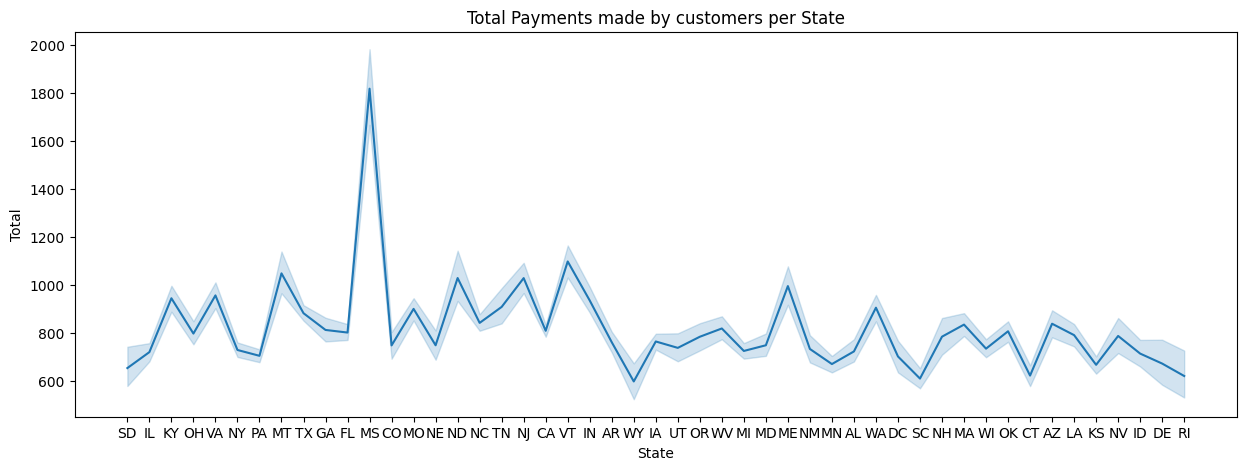

In [289]:
#Trendline
plt.figure(figsize=(15,5))
sns.lineplot(x="State", y="Total", data=df)
plt.title('Total Payments made by customers per State');

The line shows the distribution of total payment made by category for the years 2021 and 2022.

i.  It reveals mobile tablets and entertainment had the highest amount paid by customers for the period under review

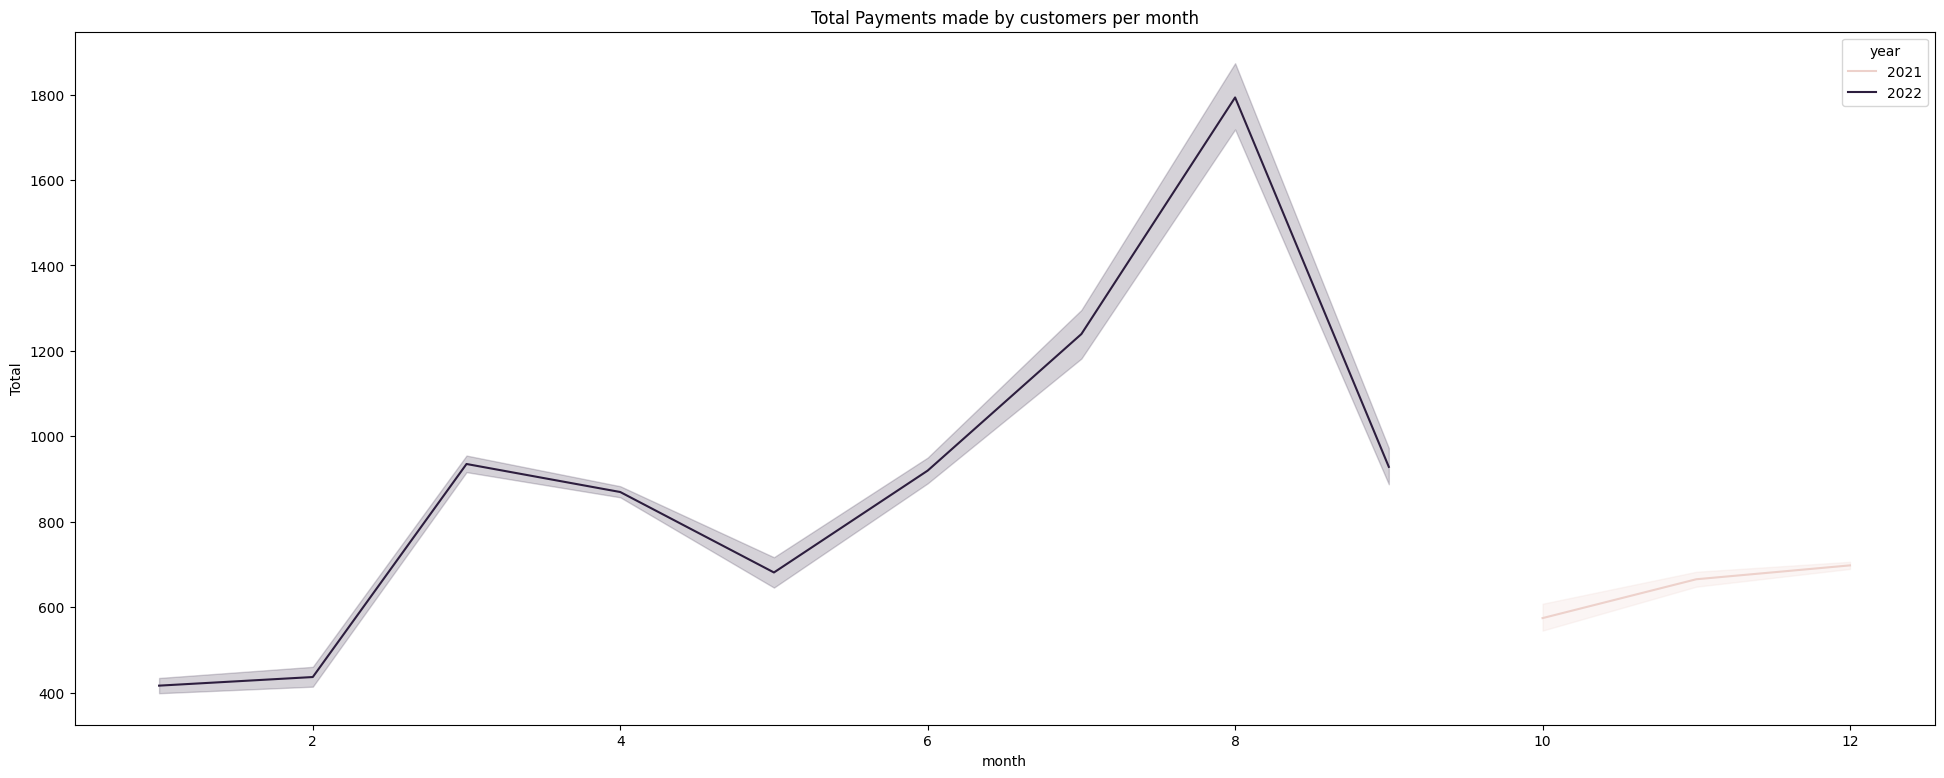

In [290]:
plt.figure(figsize=(24,9))
sns.lineplot(x="month", y="Total", data=df, hue="year")
plt.title('Total Payments made by customers per month');

The line plot revealed the highest amount paid for the year 2022 occured in the month of August.

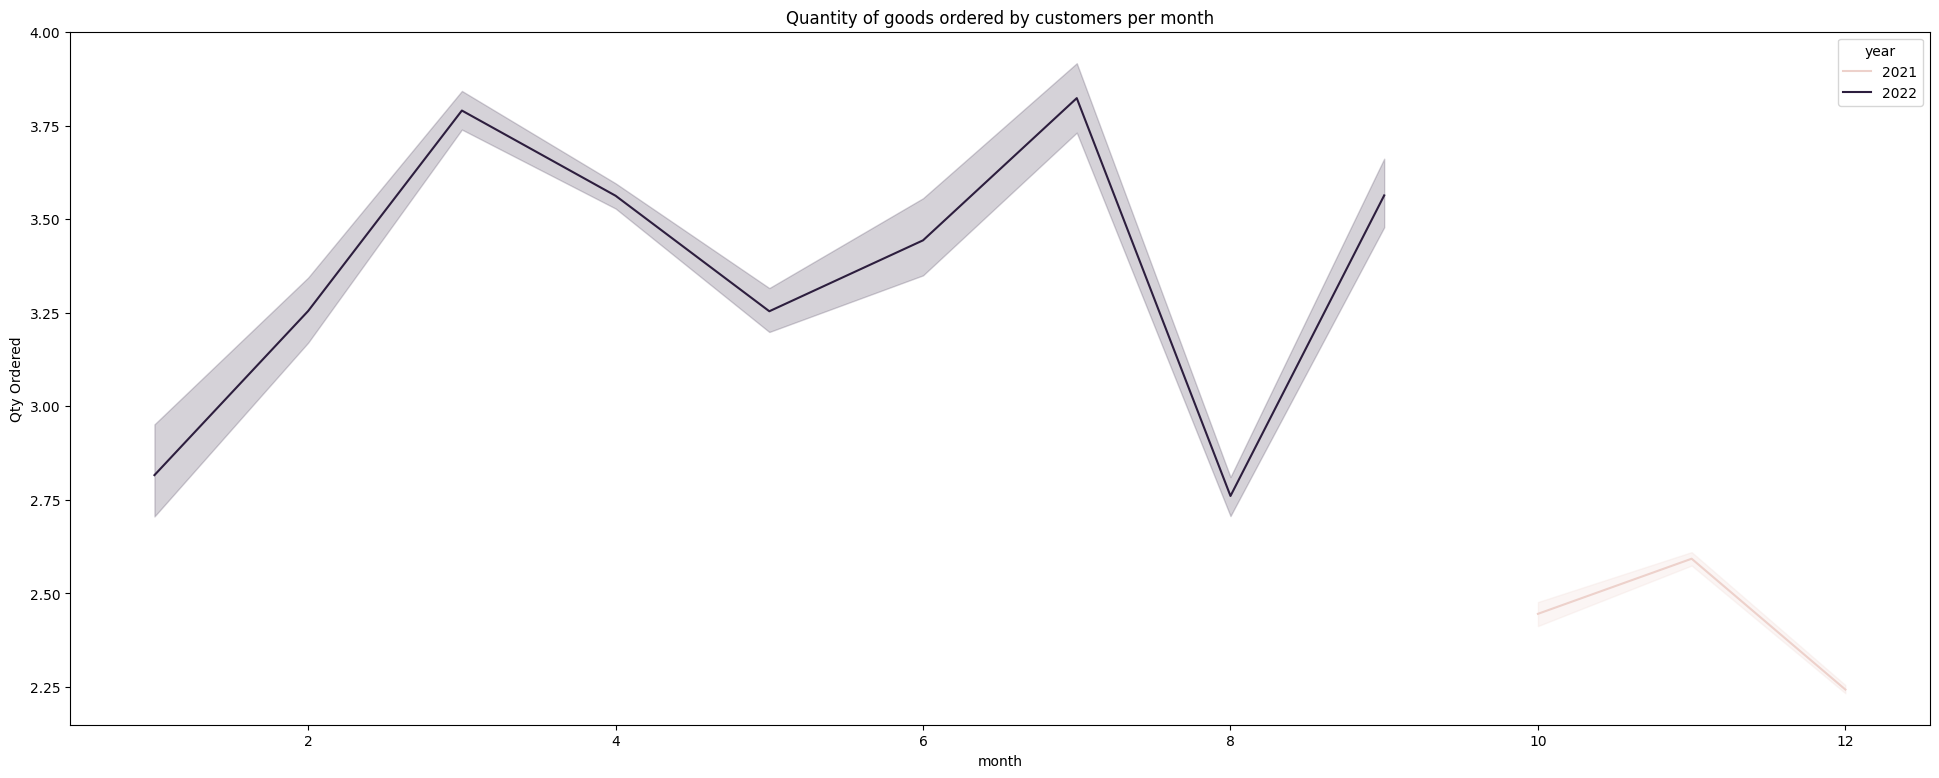

In [51]:
plt.figure(figsize=(24,9))
sns.lineplot(x="month", y="Qty Ordered", data=df, hue="year")
plt.title('Quantity of goods ordered by customers per month');

i.  The chart depicted most goods were ordered in the month of July, 2022.

# Recency, Frequency, Monetary (RFM) Analysis:

### Create new columns: Recency, Frequency, and Monetary value to understand customer behavior.

## Recency (R): This calculates how recently a customer has engaged with the business.
      i. This is calculated as the time between the customer since and  last purchase or interaction.
          Recency = Date of Order - Customer Since 
      ii. Customers who have engaged recently might be more valuable for  optimizing marketing efforts 
          and drive targeted market campaigns.

## Frequency (F): This calculates how often a customer interacts with the business. 
     i.  This is calculated as the total number of transactions or interactions over a specific period. 
         Frequency = Number of unique order per customer
     ii. High-frequent customers are those who engage with the business more frequently.

## Monetary (M): This measures the monetary value of a customer's transactions. 
     i.  This is calculated as the total amount of money spent by the customer. 
         Monetary Value = Sum total amount paid by customers 
     ii. A High monetary value reveales customers who contribute most significantly to the business's revenue.


# Recency


In [291]:
# Create a DataFrame
# df = pd.DataFrame(data)

# Convert date columns to datetime objects
df['Customer Since'] = pd.to_datetime(df['Customer Since'])
df['Date of Order'] = pd.to_datetime(df['Date of Order'])

# Calculate recency
df['Recency'] = df['Date of Order'] - df['Customer Since']

# Display the result
print(df[['Cust Id', 'Customer Since', 'Date of Order', 'Recency']])

        Cust Id Customer Since Date of Order   Recency
38265     17987     2016-09-09    2022-05-11 2070 days
803      104056     2015-03-02    2022-05-11 2627 days
249677   105009     2008-06-09    2022-05-26 5099 days
221508   107853     2016-03-07    2022-06-13 2289 days
221509   107853     2016-03-07    2022-06-13 2289 days
...         ...            ...           ...       ...
59456     45253     2010-02-02    2021-12-26 4345 days
210769    65469     2013-05-29    2022-04-06 3234 days
59455     11625     2011-03-19    2021-12-24 3933 days
59454     72615     2006-11-17    2021-12-23 5515 days
203452   104469     1995-04-08    2022-05-14 9898 days

[283078 rows x 4 columns]


# Frequency 

In [292]:
# Calculate frequency (number of unique orders per customer, this gives the number of times a customer made a purchase.)
frequency_df = df.groupby('Cust Id')['Order Id'].nunique().reset_index()
frequency_df.columns = ['Cust Id', 'Frequency']

# Display the result
print(frequency_df)

       Cust Id  Frequency
0            4         29
1           15          3
2           16          3
3           20         11
4           21          1
...        ...        ...
63641   115322          2
63642   115323          1
63643   115324          1
63644   115325          2
63645   115326          1

[63646 rows x 2 columns]


In [294]:
# Calculate monetary value (Sum Total Amount paid by customer)
df['Monetary Value'] = df['Total'] 

# Calculate total monetary value per customer
monetary_df = df.groupby('Cust Id')['Monetary Value'].sum().reset_index()
monetary_df.columns = ['Cust Id', 'Monetary Value']

# Display the result
print(monetary_df)

       Cust Id  Monetary Value
0            4       27394.190
1           15         216.800
2           16       11868.899
3           20       28719.018
4           21         105.000
...        ...             ...
63641   115322         209.600
63642   115323        4419.900
63643   115324          39.900
63644   115325          89.900
63645   115326        3559.900

[63646 rows x 2 columns]


# RFM Segmentation: Segment based on recency, frequency, and monetary value.

In [56]:
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

In [295]:
# Calculate frequency (number of unique orders per customer)
frequency_df = df.groupby('Cust Id')['Order Id'].nunique().reset_index()
frequency_df.columns = ['Cust Id', 'Frequency']

# Display the result
print(frequency_df)

# Calculate monetary value (Sum Total Amount paid by Customer)
df['Monetary Value'] = df['Total'] 

# Calculate total monetary value per customer
monetary_df = df.groupby('Cust Id')['Monetary Value'].sum().reset_index()
monetary_df.columns = ['Cust Id', 'Monetary Value']

# RFM Segmentation: Segment based on recency, frequency, and monetary value.

import pandas as pd
from datetime import datetime, timedelta
from sklearn.cluster import KMeans

current_date = max(df['Date of Order']) #calculates the latest 'Date of Order"

# Example corrected code for Recency calculation:
df['Recency'] = current_date - df['Date of Order']

# Example corrected code for 'rfm_df' creation and merging:
rfm_df = df.groupby('Cust Id').agg({
    'Date of Order': lambda x: (current_date - x.max()).days,  # Recency
    'Order Id': 'nunique',  # Frequency
    'Total': 'sum'  # Monetary Value
}).reset_index()

# Merge the Frequency, Monetary Value, and Recency data into the RFM DataFrame
rfm_df = pd.merge(rfm_df, frequency_df, on='Cust Id')
rfm_df = pd.merge(rfm_df, monetary_df, on='Cust Id')
rfm_df = pd.merge(rfm_df, df.groupby('Cust Id')['Recency'].max().reset_index(), on='Cust Id')


# Merge the Frequency and Monetary Value data into the RFM DataFrame
rfm_df = pd.merge(rfm_df, frequency_df, on='Cust Id')
rfm_df = pd.merge(rfm_df, monetary_df, on='Cust Id')

# Fix the Recency calculation for each row in the original dataframe
df['Recency'] = current_date - df.groupby('Cust Id')['Date of Order'].transform('max')

# Calculate 'Recency', 'Frequency', and 'Monetary Value' for the 'rfm_df' dataframe
rfm_df = df.groupby('Cust Id').agg({
    'Date of Order': lambda x: (current_date - x.max()).days,  # Recency
    'Order Id': 'nunique',  # Frequency
    'Total': 'sum'  # Monetary Value
}).reset_index()

# Merge the Frequency, Monetary Value, and Recency data into the RFM DataFrame
rfm_df = pd.merge(rfm_df, frequency_df, on='Cust Id')
rfm_df = pd.merge(rfm_df, monetary_df, on='Cust Id')
rfm_df = pd.merge(rfm_df, df.groupby('Cust Id')['Recency'].max().reset_index(), on='Cust Id')

print(rfm_df)
print(current_date)

       Cust Id  Frequency
0            4         29
1           15          3
2           16          3
3           20         11
4           21          1
...        ...        ...
63641   115322          2
63642   115323          1
63643   115324          1
63644   115325          2
63645   115326          1

[63646 rows x 2 columns]
       Cust Id  Date of Order  Order Id      Total  Frequency  Monetary Value  \
0            4              1        29  27394.190         29       27394.190   
1           15            231         3    216.800          3         216.800   
2           16            322         3  11868.899          3       11868.899   
3           20              1        11  28719.018         11       28719.018   
4           21            239         1    105.000          1         105.000   
...        ...            ...       ...        ...        ...             ...   
63641   115322              0         2    209.600          2         209.600   
63642   115323

In [296]:
rfm_df.describe()

Cust Id  Date of Order      Order Id         Total     Frequency  \
count   63646.000000   63646.000000  63646.000000  6.364600e+04  63646.000000   
mean    79750.238617     193.324529      3.131839  3.630353e+03      3.131839   
std     25541.461480      90.024518      8.612930  2.156474e+04      8.612930   
min         4.000000       0.000000      1.000000  0.000000e+00      1.000000   
25%     67133.250000     134.000000      1.000000  1.272250e+02      1.000000   
50%     83200.500000     187.000000      1.000000  4.663500e+02      1.000000   
75%     99241.750000     277.000000      3.000000  2.345700e+03      3.000000   
max    115326.000000     364.000000    928.000000  1.900290e+06    928.000000   

       Monetary Value                      Recency  
count    6.364600e+04                        63646  
mean     3.630353e+03  193 days 07:47:19.342613834  
std      2.156474e+04   90 days 00:35:18.362180250  
min      0.000000e+00              0 days 00:00:00  
25%      1.272250e+02            134 days 00:00:00  
50%      4.663500e+02            187 days 00:00:00  
75%      2.345700e+03            277 days 00:00:00  
max      1.900290e+06            364 days 00:00:00

## Top 10 Customers by Monetary Value( Who made the highest amount of purchase)

In [297]:
# Sort the dataset by 'Payment Amount' in descending order
rfm_df.sort_values(by='Monetary Value', ascending=False, inplace=True)

# Select the top 10 customers
top_10_customers = rfm_df.head(10)

# Print the top 10 customers
top_10_customers

Cust Id  Date of Order  Order Id        Total  Frequency  \
57435   109038             39       102  1900289.900        102   
58595   110215             10        94  1628440.100         94   
62029   113694              0       220  1568177.600        220   
59427   111057             37        76  1368422.600         76   
5399     39707              1       386  1295994.580        386   
1783     11305             76       108  1069137.700        108   
57607   109213             68        60   844203.648         60   
54380   105943             15        55   647792.500         55   
54408   105971              2       109   640112.300        109   
61312   112966             39        26   629743.200         26   

       Monetary Value Recency  
57435     1900289.900 39 days  
58595     1628440.100 10 days  
62029     1568177.600  0 days  
59427     1368422.600 37 days  
5399      1295994.580  1 days  
1783      1069137.700 76 days  
57607      844203.648 68 days  
54380      647792.500 15 days  
54408      640112.300  2 days  
61312      629743.200 39 days

## Top 10 Customers by Frequency (Highest Frequent Orders)

In [298]:
# Sort the dataset by 'Frquency' in descending order
rfm_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Select the top 10 customers
top_10_customers = rfm_df.head(10)

# Print the top 10 customers
top_10_customers

Cust Id  Date of Order  Order Id        Total  Frequency  \
34369    85775              1       928    91441.200        928   
36308    87724              2       692    86216.860        692   
45438    96927             10       591    85166.960        591   
5399     39707              1       386  1295994.580        386   
32354    83736             12       279   450104.790        279   
164        800             14       239   165276.745        239   
62029   113694              0       220  1568177.600        220   
10414    61569            234       218    57280.400        218   
8793     59331             88       205   406688.800        205   
31984    83364             20       205   341215.504        205   

       Monetary Value  Recency  
34369       91441.200   1 days  
36308       86216.860   2 days  
45438       85166.960  10 days  
5399      1295994.580   1 days  
32354      450104.790  12 days  
164        165276.745  14 days  
62029     1568177.600   0 days  
10414       57280.400 234 days  
8793       406688.800  88 days  
31984      341215.504  20 days

## Top 10 Customers by Recency (Made purchases recently)

In [299]:
# Sort the dataset by 'Frquency' in descending order
rfm_df.sort_values(by='Recency', ascending=True, inplace=True)

# Select the top 10 customers
top_10_customers = rfm_df.head(10)

# Print the top 10 customers
top_10_customers

Cust Id  Date of Order  Order Id      Total  Frequency  Monetary Value  \
63273   114948              0         5   8519.500          5        8519.500   
63643   115324              0         1     39.900          1          39.900   
63631   115312              0         1    174.900          1         174.900   
4194     28829              0        23  22196.350         23       22196.350   
63640   115321              0         1  12999.900          1       12999.900   
63642   115323              0         1   4419.900          1        4419.900   
6598     46833              0        37   7487.780         37        7487.780   
63644   115325              0         2     89.900          2          89.900   
16732    67966              0         8  11053.410          8       11053.410   
63114   114788              0         4   1901.294          4        1901.294   

      Recency  
63273  0 days  
63643  0 days  
63631  0 days  
4194   0 days  
63640  0 days  
63642  0 days  
6598   0 days  
63644  0 days  
16732  0 days  
63114  0 days

## Top 10 Customers who have not made purchases within the last 365days. 

In [300]:
# Sort the dataset by 'Frquency' in descending order
rfm_df.sort_values(by='Recency', ascending=False, inplace=True)

# Select the top 10 customers
top_10_customers = rfm_df.head(10)

# Print the top 10 customers
top_10_customers

Cust Id  Date of Order  Order Id   Total  Frequency  Monetary Value  \
9027    60173            364         1  1311.2          1          1311.2   
2474    15949            364         1   159.6          1           159.6   
8986    60132            364         2   474.0          2           474.0   
9032    60178            364         1  1000.0          1          1000.0   
9025    60171            364         1    75.0          1            75.0   
8384    57691            364         1   159.6          1           159.6   
9047    60193            364         1   849.9          1           849.9   
9055    60201            364         1   495.0          1           495.0   
9008    60154            364         1    31.6          1            31.6   
842      5926            364         1   108.0          1           108.0   

      Recency  
9027 364 days  
2474 364 days  
8986 364 days  
9032 364 days  
9025 364 days  
8384 364 days  
9047 364 days  
9055 364 days  
9008 364 days  
842  364 days

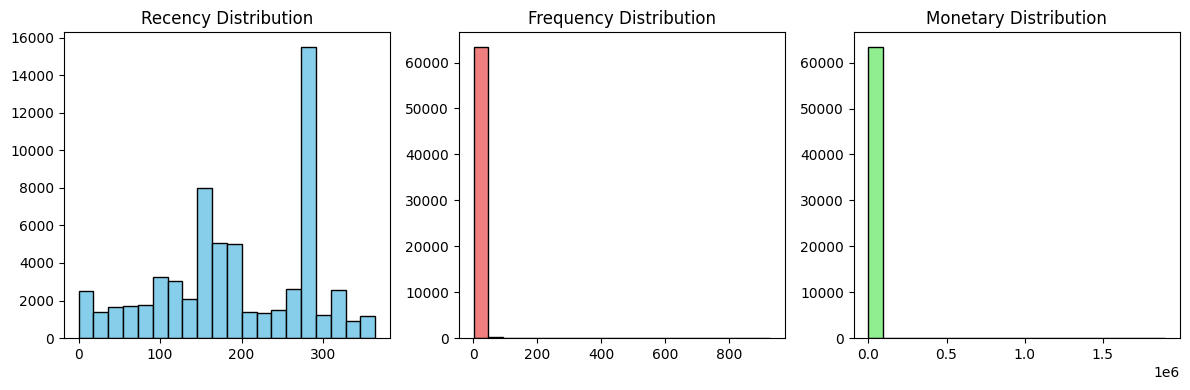

In [301]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

rfm_df['Recency'] = pd.to_timedelta(rfm_df['Recency']).dt.days


# Visualize the distribution of RFM values
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(rfm_df['Recency'], bins=20, color='skyblue', edgecolor='black')
plt.title('Recency Distribution')

plt.subplot(132)
plt.hist(rfm_df['Frequency'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Frequency Distribution')

plt.subplot(133)
plt.hist(rfm_df['Monetary Value'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()


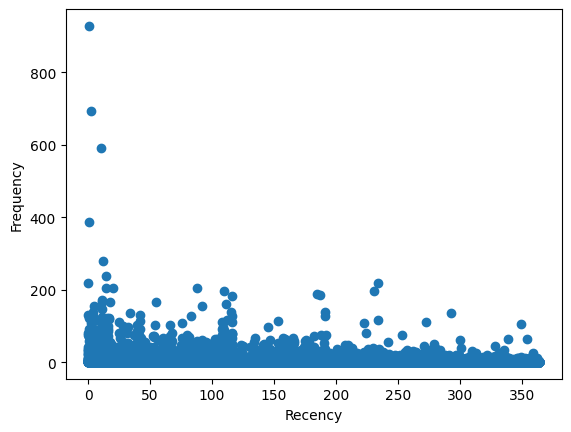

In [302]:
# Alternatively, scatter plots for visualizing outliers
plt.scatter(rfm_df['Recency'], rfm_df['Frequency'])
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

From the chart above more customers made high purchase of goods recently.

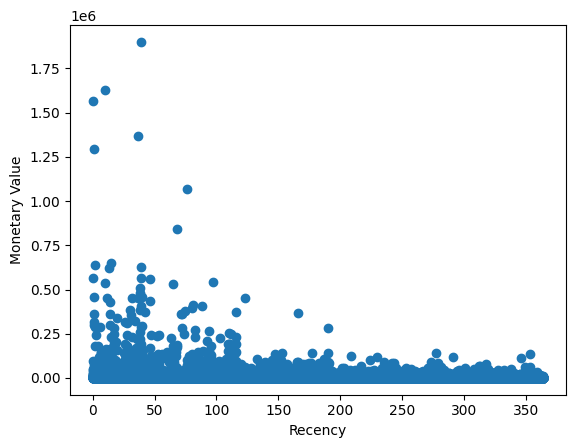

In [304]:
# Alternatively, scatter plots for visualizing outliers
plt.scatter(rfm_df['Recency'], rfm_df['Monetary Value'])
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.show()

A higher amount of goods were purchased recently.

## Statistical summary to identify potential outliers

In [306]:
# Statistical summary to identify potential outliers
rfm_summary = rfm_df[['Recency', 'Frequency', 'Monetary Value']].describe()
rfm_summary

Recency     Frequency  Monetary Value
count  63646.000000  63646.000000    6.364600e+04
mean     193.324529      3.131839    3.630353e+03
std       90.024518      8.612930    2.156474e+04
min        0.000000      1.000000    0.000000e+00
25%      134.000000      1.000000    1.272250e+02
50%      187.000000      1.000000    4.663500e+02
75%      277.000000      3.000000    2.345700e+03
max      364.000000    928.000000    1.900290e+06

In [307]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Extract RFM values
rfm_values = rfm_df[['Recency', 'Frequency', 'Monetary Value']]

# Standardize the RFM values
scaler = StandardScaler()
rfm_standardized = scaler.fit_transform(rfm_values)

# Create a new DataFrame with standardized values
rfm_standardized_df = pd.DataFrame(rfm_standardized, columns=['Recency', 'Frequency', 'Monetary Value'])

# Display the standardized RFM DataFrame
print(rfm_standardized_df)

        Recency  Frequency  Monetary Value
0      1.895893  -0.247518       -0.107545
1      1.895893  -0.247518       -0.160947
2      1.895893  -0.131413       -0.146368
3      1.895893  -0.247518       -0.121976
4      1.895893  -0.247518       -0.164870
...         ...        ...             ...
63641 -2.147482  -0.247518       -0.160749
63642 -2.147482  -0.015307       -0.151149
63643 -2.147482  -0.247518       -0.162626
63644 -2.147482  -0.131413       -0.156291
63645 -2.147482   0.216904        0.226721

[63646 rows x 3 columns]


RFM Statistical Summary

In [308]:
rfm_standardized_df. describe()

Recency     Frequency  Monetary Value
count  6.364600e+04  6.364600e+04    6.364600e+04
mean  -5.680903e-15  1.364499e-14   -6.266700e-16
std    1.000008e+00  1.000008e+00    1.000008e+00
min   -2.147482e+00 -2.475180e-01   -1.683480e-01
25%   -6.589871e-01 -2.475180e-01   -1.624483e-01
50%   -7.025396e-02 -2.475180e-01   -1.467223e-01
75%    9.294815e-01 -1.530718e-02   -5.957237e-02
max    1.895893e+00  1.073822e+02    8.795258e+01

In [ ]:
Here the standard deviation is 1 , min value for recency is -2,freq is -2, & monetary value is -1
max. value is  for recency 1.8, freq is 1, monetary value is 8.7

### RFM Scores

Assign RFM Scores to the data set.

The simplest way to create customer Segment from an RFM model is by using Quartiles as a scale. 
We will assign a score from -2 to 2 to each category (Recency)
Recency Score Scale:i. (-2, to -1) = Most Recent Customers 
                    ii.(-1 to 0) = Recent Customers 
                    iii.(0 to 1)=  Lost Customers 
                    iv. (1 to 2)=  Top Lost Customer
We will assign a score from -2 to 2 to each category (Frequency)                   
Frequency Score Scale: i. (-2, to -1) = Least Frequent Customers
                       ii. (-1 to 0) = Frequent Customers 
                       iii. (0 to 1)= More Frequent Customers and 
                       iv. (1 to 2)= Most Frequent Customers.
                       
We will assign a score from -1 to 9 to each category (Monetary Value)                       
Monetary Value Scoare Scale: 
                        i. (-2, to -1) =Least Amount Paid
                        ii. (0 to 3) = Low Amount Paid 
                        iii. (4 to 6)= High Amount Paid 
                        iv. (7 to 9)=Highest Amount Paid

The final RFM score is calculated by combining all RFM values. 
For Customer Segmentation, you will use the customer_rfm data set resulting from the RFM analysis.

Note: Data can be assigned into more groups for better granularity, but we will use 4 in this case.

In [309]:
# RFM Scores
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Copy the standardized RFM DataFrame to avoid modifying the original data
df1 = pd.DataFrame(rfm_standardized_df)

# Define score_ranges based on your business logic
score_ranges = {
    'Recency': [(-2, -1), (-1, 0), (0, 1), (1, 2)],
    'Frequency': [(-2, -1), (-1, 0), (0, 1), (1, 2)],
    'Monetary Value': [(-2, -1), (0, 3), (4, 6), (7, 9)]
}

# Standardize the RFM values
scaler = StandardScaler()
df1[['Recency', 'Frequency', 'Monetary Value']] = scaler.fit_transform(df1[['Recency', 'Frequency', 'Monetary Value']])

# Function to assign scores based on ranges
def assign_scores(value, ranges):
    for i, r in enumerate(ranges):
        if r[0] <= value <= r[1]:
            return i + 1  # Score starts from 1
    return len(ranges) + 1  # Maximum score for values outside defined ranges

# Apply the scoring function to each RFM dimension
for dimension in ['Recency', 'Frequency', 'Monetary Value']:
    df1[f'{dimension}_Score'] = df1[dimension].apply(lambda x: assign_scores(x, score_ranges[dimension]))

# Combine individual scores into an overall RFM score
df1['RFM_Score'] = df1[['Recency_Score', 'Frequency_Score', 'Monetary Value_Score']].astype(str).agg(''.join, axis=1)

# Display the DataFrame with RFM scores
print(df1[['Recency', 'Frequency', 'Monetary Value', 'RFM_Score']])
df1



        Recency  Frequency  Monetary Value RFM_Score
0      1.895893  -0.247518       -0.107545       425
1      1.895893  -0.247518       -0.160947       425
2      1.895893  -0.131413       -0.146368       425
3      1.895893  -0.247518       -0.121976       425
4      1.895893  -0.247518       -0.164870       425
...         ...        ...             ...       ...
63641 -2.147482  -0.247518       -0.160749       525
63642 -2.147482  -0.015307       -0.151149       525
63643 -2.147482  -0.247518       -0.162626       525
63644 -2.147482  -0.131413       -0.156291       525
63645 -2.147482   0.216904        0.226721       532

[63646 rows x 4 columns]


Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              4                2   
1      1.895893  -0.247518       -0.160947              4                2   
2      1.895893  -0.131413       -0.146368              4                2   
3      1.895893  -0.247518       -0.121976              4                2   
4      1.895893  -0.247518       -0.164870              4                2   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              5                2   
63642 -2.147482  -0.015307       -0.151149              5                2   
63643 -2.147482  -0.247518       -0.162626              5                2   
63644 -2.147482  -0.131413       -0.156291              5                2   
63645 -2.147482   0.216904        0.226721              5                3   

       Monetary Value_Score RFM_Score  
0                         5       425  
1                         5       425  
2                         5       425  
3                         5       425  
4                         5       425  
...                     ...       ...  
63641                     5       525  
63642                     5       525  
63643                     5       525  
63644                     5       525  
63645                     2       532  

[63646 rows x 7 columns]

## RFM Distribution

In [311]:
import plotly.express as px
fig = px.histogram(df1, x = df1['RFM_Score'].value_counts().index, 
                   y = df1['RFM_Score'].value_counts().values, 
                   title = 'Customer RFM Score Distribution',
                   labels = dict(x = "RFM_Score", y ="counts"))
fig.show()

In [312]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63646 entries, 0 to 63645
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recency               63646 non-null  float64
 1   Frequency             63646 non-null  float64
 2   Monetary Value        63646 non-null  float64
 3   Recency_Score         63646 non-null  int64  
 4   Frequency_Score       63646 non-null  int64  
 5   Monetary Value_Score  63646 non-null  int64  
 6   RFM_Score             63646 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 3.4+ MB


In [313]:
df1.groupby(['RFM_Score']).size().sort_values(ascending=False)[:]

RFM_Score
225    15790
325    15321
425     7686
125     6004
232     2389
235     2290
332     2068
335     1714
222     1668
135     1289
322     1175
132      869
525      722
122      587
435      526
432      501
242      465
422      453
142      358
152      258
252      197
535      181
342      167
532      134
552      111
542       88
155       80
145       76
522       61
245       60
352       56
255       45
555       34
345       33
442       33
153       32
553       13
154       13
452       12
545       12
133       11
355        9
143        9
445        8
144        7
253        7
254        6
233        3
554        3
455        3
243        2
443        2
134        2
353        2
343        1
dtype: int64

## Define rfm_level function that tags customers by using RFM_Scrores and Create a new variable RFM_Label.

In [314]:
df1['RFM_Label'] = df1['Recency_Score'] + df1['Frequency_Score'] + df1['Monetary Value_Score']

df1.sample(8)

Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
28625  0.040828  -0.015307       -0.145761              3                2   
57484 -1.469884   0.100798        0.433074              1                3   
9021   1.007239  -0.247518       -0.112840              4                2   
17431  0.929482  -0.247518       -0.165107              3                2   
8346   1.007239  -0.247518       -0.166961              4                2   
23565  0.718426  -0.247518       -0.165107              3                2   
6912   1.018347  -0.247518       -0.160483              4                2   
56810 -1.403235   0.797431        0.102824              1                3   

       Monetary Value_Score RFM_Score  RFM_Label  
28625                     5       325         10  
57484                     2       132          6  
9021                      5       425         11  
17431                     5       325         10  
8346                      5       425         11  
23565                     5       325         10  
6912                      5       425         11  
56810                     2       132          6

In [315]:
fig = px.pie(df1, values = df1['RFM_Label'].value_counts(), 
             names = (df1["RFM_Label"].value_counts()).index, 
             title = 'RFM Label Distribution')
fig.show()

In [316]:
df1['RFM_Label'].min()

5

In [317]:
df1['RFM_Label'].max()

15

In [318]:
df1["RFM_Label"].shape

(63646,)

In [319]:
df1["RFM_Label"].nunique

<bound method IndexOpsMixin.nunique of 0        11
1        11
2        11
3        11
4        11
         ..
63641    12
63642    12
63643    12
63644    12
63645    10
Name: RFM_Label, Length: 63646, dtype: int64>

In [320]:
df1

Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              4                2   
1      1.895893  -0.247518       -0.160947              4                2   
2      1.895893  -0.131413       -0.146368              4                2   
3      1.895893  -0.247518       -0.121976              4                2   
4      1.895893  -0.247518       -0.164870              4                2   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              5                2   
63642 -2.147482  -0.015307       -0.151149              5                2   
63643 -2.147482  -0.247518       -0.162626              5                2   
63644 -2.147482  -0.131413       -0.156291              5                2   
63645 -2.147482   0.216904        0.226721              5                3   

       Monetary Value_Score RFM_Score  RFM_Label  
0                         5       425         11  
1                         5       425         11  
2                         5       425         11  
3                         5       425         11  
4                         5       425         11  
...                     ...       ...        ...  
63641                     5       525         12  
63642                     5       525         12  
63643                     5       525         12  
63644                     5       525         12  
63645                     2       532         10  

[63646 rows x 8 columns]

In [321]:
df4 = rfm_standardized_df.assign(CustId=rfm_df['Cust Id'])
print(df4)

        Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              4                2   
1      1.895893  -0.247518       -0.160947              4                2   
2      1.895893  -0.131413       -0.146368              4                2   
3      1.895893  -0.247518       -0.121976              4                2   
4      1.895893  -0.247518       -0.164870              4                2   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              5                2   
63642 -2.147482  -0.015307       -0.151149              5                2   
63643 -2.147482  -0.247518       -0.162626              5                2   
63644 -2.147482  -0.131413       -0.156291              5                2   
63645 -2.147482   0.216904        0.226721              5                3   

       Monetary Value_Score  CustId  
0                        

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



       CustId   Recency  Frequency  Monetary Value  Segment      SegmentName
0           4  1.895893  -0.247518       -0.107545        1  Loyal Customers
1          15  1.895893  -0.247518       -0.160947        1  Loyal Customers
2          16  1.895893  -0.131413       -0.146368        1  Loyal Customers
3          20  1.895893  -0.247518       -0.121976        1  Loyal Customers
4          21  1.895893  -0.247518       -0.164870        1  Loyal Customers
...       ...       ...        ...             ...      ...              ...
63641  115322 -2.147482  -0.247518       -0.160749        3   Lost Customers
63642  115323 -2.147482  -0.015307       -0.151149        3   Lost Customers
63643  115324 -2.147482  -0.247518       -0.162626        3   Lost Customers
63644  115325 -2.147482  -0.131413       -0.156291        3   Lost Customers
63645  115326 -2.147482   0.216904        0.226721        3   Lost Customers

[63646 rows x 6 columns]


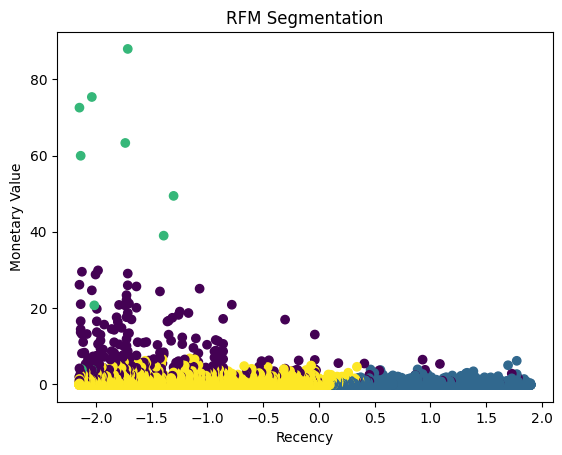

In [322]:
df = pd.DataFrame(df4)

# Select features for clustering (Recency, Frequency, Monetary)
features = df[['Recency', 'Frequency', 'Monetary Value']]

# Choose the number of clusters (customize based on your business needs)
num_clusters = 4

# Apply k-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Segment'] = kmeans.fit_predict(features)

# Define the segment names based on cluster indices
segment_names = [
    'Champions', 'Loyal Customers','At Risk', 
    'Lost Customers', 
]

# Map cluster indices to segment names
df['SegmentName'] = df['Segment'].map(dict(enumerate(segment_names)))

# Display the resulting DataFrame
print(df[['CustId', 'Recency', 'Frequency', 'Monetary Value', 'Segment', 'SegmentName']])

# Visualize the clusters (2D plot for simplicity, customize for 3D if needed)
plt.scatter(df['Recency'], df['Monetary Value'], c=df['Segment'], cmap='viridis')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.title('RFM Segmentation')
plt.show()

In [ ]:
Green -These set of customers made the highest payments and recently purchased goods they are champions.
Purple - These set of customers paid the average amount and recently made purchased - they are the loyal customers.
Yellow - These set of customers are made low payments and recently purchased goods - these are the at risk customerss.
Blue - These customers have made very low payments and not recently purchased goods - they are the lost customers.

## MACHINE LEARNING & MODEL

## K means 

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

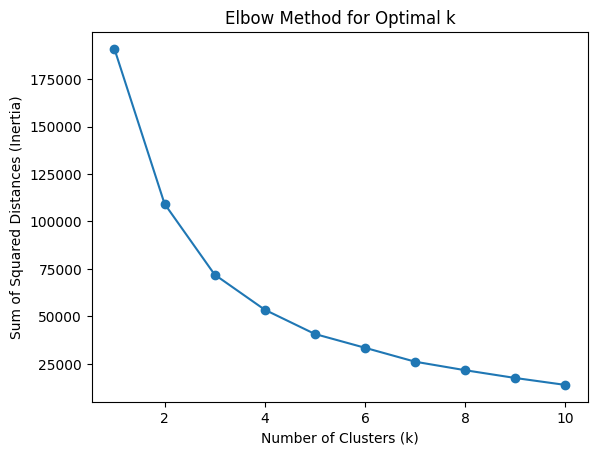

In [323]:
rfm_score_df = pd.DataFrame(df1)

# Extract only the RFM score columns
rfm_score_columns = ['Recency_Score', 'Frequency_Score', 'Monetary Value_Score']

# Standardize the data
scaler = StandardScaler()
rfm_score_std = scaler.fit_transform(rfm_score_df[rfm_score_columns])

# Initialize a range of k values
k_values = range(1, 11)

# Fit K-Means for each k and calculate inertia
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_score_std)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.show()


The number of clusters is 4. 

In [324]:
print(df4)

        Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              4                2   
1      1.895893  -0.247518       -0.160947              4                2   
2      1.895893  -0.131413       -0.146368              4                2   
3      1.895893  -0.247518       -0.121976              4                2   
4      1.895893  -0.247518       -0.164870              4                2   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              5                2   
63642 -2.147482  -0.015307       -0.151149              5                2   
63643 -2.147482  -0.247518       -0.162626              5                2   
63644 -2.147482  -0.131413       -0.156291              5                2   
63645 -2.147482   0.216904        0.226721              5                3   

       Monetary Value_Score  CustId  
0                        

## Label Encoding: 
This is to convert categorical scores into numerical values. 
This process is necessary because most machine learning algorithms can only process numerical data.

Label Encoding assigns a unique numerical value to each category present in the categorical variable.
It achieves this by creating a mapping of labels to integers and vice versa.

In [325]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [328]:
# n= clusters will be 10.

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

# Copy the dataframe to avoid modifying the original data
rfm_score_df = pd.DataFrame(df4)

# Encode categorical scores into numerical values
label_encoder = LabelEncoder()
rfm_score_df['Recency_Score'] = label_encoder.fit_transform(rfm_score_df['Recency_Score'])
rfm_score_df['Frequency_Score'] = label_encoder.fit_transform(rfm_score_df['Frequency_Score'])
rfm_score_df['Monetary Value_Score'] = label_encoder.fit_transform(rfm_score_df['Monetary Value_Score'])

# Extract only the RFM score columns
rfm_score_columns = ['Recency_Score', 'Frequency_Score', 'Monetary Value_Score']

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
# Use the standardization columns for clustering
rfm_score_df['Cluster'] = kmeans.fit_predict(rfm_score_df[rfm_score_columns])

# Define segment criteria based on standardized RFM scores
def segment_customers(row):
    recency = row['Recency_Score']
    frequency = row['Frequency_Score']
    monetary = row['Monetary Value_Score']
    
    if recency >= -2 and frequency >= 1 and monetary >= 2:
        return 'Champions'
    elif recency >= 0 and recency < 1 and frequency >= 2 and monetary < 2:
        return 'Loyal Customers'
    elif recency >= 0 and recency < 2 and frequency < 2 and monetary < 2:
        return 'Premium Loyal Customers'
    elif recency < 2 and frequency >= 1 and monetary >= 2:
        return 'At-Risk Customers'
    else:
        return 'Lost Customers'


# Apply segment_customers function to create a 'Segment' column
rfm_score_df['Segment'] = rfm_score_df.apply(segment_customers, axis=1)

# Display the DataFrame with segments
print(rfm_score_df[['Recency_Score', 'Frequency_Score', 'Monetary Value_Score', 'Cluster', 'Segment','CustId']])


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



       Recency_Score  Frequency_Score  Monetary Value_Score  Cluster  \
0                  3                0                     3        4   
1                  3                0                     3        4   
2                  3                0                     3        4   
3                  3                0                     3        4   
4                  3                0                     3        4   
...              ...              ...                   ...      ...   
63641              4                0                     3        4   
63642              4                0                     3        4   
63643              4                0                     3        4   
63644              4                0                     3        4   
63645              4                1                     0        3   

              Segment  CustId  
0      Lost Customers       4  
1      Lost Customers      15  
2      Lost Customers      16  
3      

## Evaluate the clusters and segment.

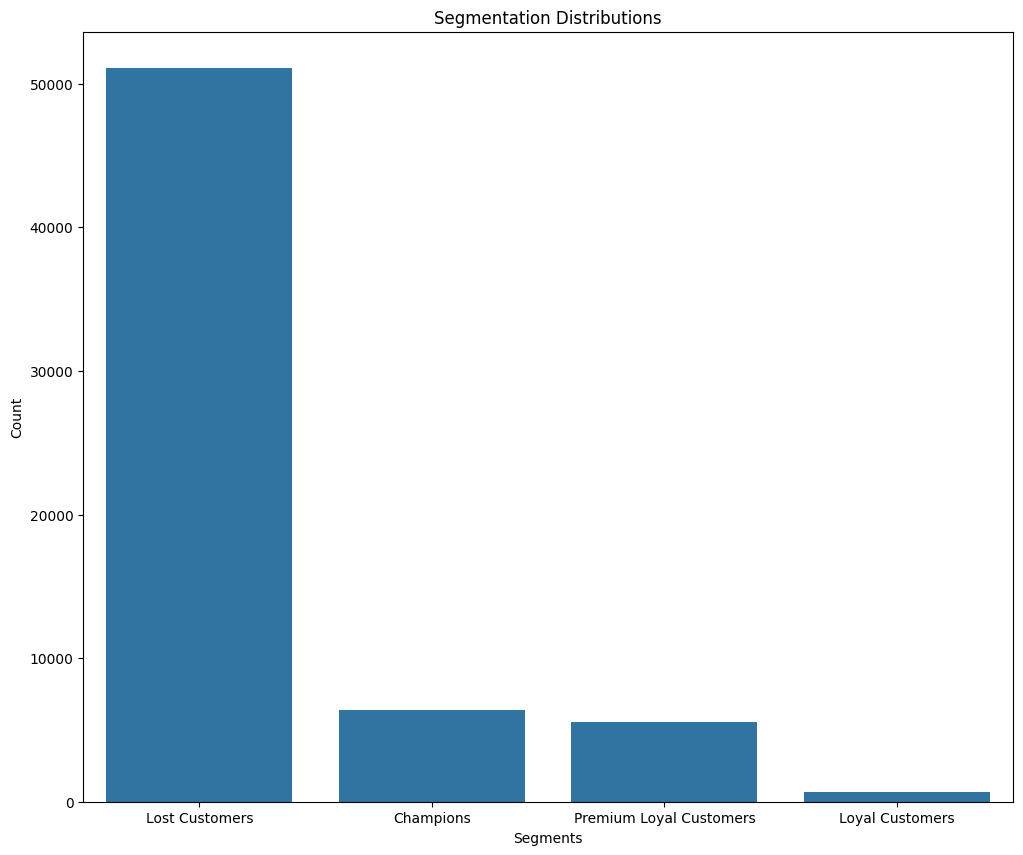

In [329]:
plt.figure(figsize=(12,10))
sns.countplot(x=rfm_score_df['Segment'])
plt.title("Segmentation Distributions")
plt.xlabel("Segments")
plt.ylabel("Count")
plt.show()

In [330]:
fig = px.pie(df1, values = rfm_score_df['Segment'].value_counts(), 
             names = (rfm_score_df["Segment"].value_counts()).index, 
             title = 'Segmentation Distribution')
fig.show()

In [331]:
df1

Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              4                2   
1      1.895893  -0.247518       -0.160947              4                2   
2      1.895893  -0.131413       -0.146368              4                2   
3      1.895893  -0.247518       -0.121976              4                2   
4      1.895893  -0.247518       -0.164870              4                2   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              5                2   
63642 -2.147482  -0.015307       -0.151149              5                2   
63643 -2.147482  -0.247518       -0.162626              5                2   
63644 -2.147482  -0.131413       -0.156291              5                2   
63645 -2.147482   0.216904        0.226721              5                3   

       Monetary Value_Score RFM_Score  RFM_Label  
0                         5       425         11  
1                         5       425         11  
2                         5       425         11  
3                         5       425         11  
4                         5       425         11  
...                     ...       ...        ...  
63641                     5       525         12  
63642                     5       525         12  
63643                     5       525         12  
63644                     5       525         12  
63645                     2       532         10  

[63646 rows x 8 columns]

In [332]:
rfm_score_df

Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              3                0   
1      1.895893  -0.247518       -0.160947              3                0   
2      1.895893  -0.131413       -0.146368              3                0   
3      1.895893  -0.247518       -0.121976              3                0   
4      1.895893  -0.247518       -0.164870              3                0   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              4                0   
63642 -2.147482  -0.015307       -0.151149              4                0   
63643 -2.147482  -0.247518       -0.162626              4                0   
63644 -2.147482  -0.131413       -0.156291              4                0   
63645 -2.147482   0.216904        0.226721              4                1   

       Monetary Value_Score  CustId  Cluster         Segment  
0                         3       4        4  Lost Customers  
1                         3      15        4  Lost Customers  
2                         3      16        4  Lost Customers  
3                         3      20        4  Lost Customers  
4                         3      21        4  Lost Customers  
...                     ...     ...      ...             ...  
63641                     3  115322        4  Lost Customers  
63642                     3  115323        4  Lost Customers  
63643                     3  115324        4  Lost Customers  
63644                     3  115325        4  Lost Customers  
63645                     0  115326        3  Lost Customers  

[63646 rows x 9 columns]

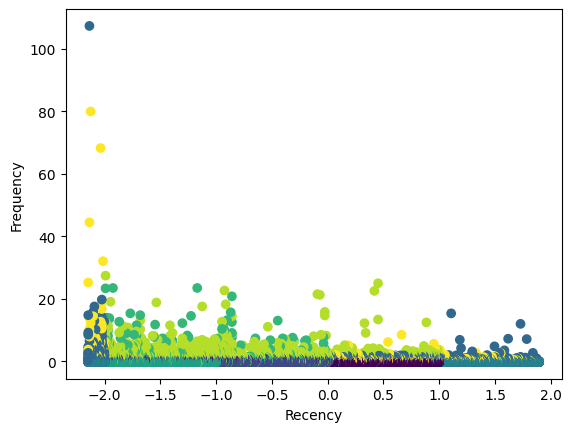

In [333]:
#Visualizing all the clusters 

# Visualize cluster results
plt.scatter(rfm_score_df["Recency"], rfm_score_df["Frequency"], c=rfm_score_df["Cluster"], label="Centroids")
plt.xlabel("Recency")
plt.ylabel("Frequency")
plt.show()

In [334]:
rfm_score_df.describe()

Recency     Frequency  Monetary Value  Recency_Score  \
count  6.364600e+04  6.364600e+04    6.364600e+04   63646.000000   
mean  -5.680903e-15  1.364499e-14   -6.215307e-16       1.525972   
std    1.000008e+00  1.000008e+00    1.000008e+00       0.984287   
min   -2.147482e+00 -2.475180e-01   -1.683480e-01       0.000000   
25%   -6.589871e-01 -2.475180e-01   -1.624483e-01       1.000000   
50%   -7.025396e-02 -2.475180e-01   -1.467223e-01       1.000000   
75%    9.294815e-01 -1.530718e-02   -5.957237e-02       2.000000   
max    1.895893e+00  1.073822e+02    8.795258e+01       4.000000   

       Frequency_Score  Monetary Value_Score         CustId       Cluster  
count     63646.000000          63646.000000   63646.000000  63646.000000  
mean          0.271219              2.447805   79750.238617      2.904849  
std           0.567652              1.161093   25541.461480      2.472105  
min           0.000000              0.000000       4.000000      0.000000  
25%           0.000000              3.000000   67133.250000      1.000000  
50%           0.000000              3.000000   83200.500000      2.000000  
75%           0.000000              3.000000   99241.750000      4.000000  
max           3.000000              3.000000  115326.000000      9.000000

In [336]:
rfm_score_df["Segment"].value_counts()

Lost Customers             51071
Champions                   6391
Premium Loyal Customers     5527
Loyal Customers              657
Name: Segment, dtype: int64

## ANOTHER MACHINE LEARNING METHOD USED: 
        
ONE HOT ENCOCODING: One-Hot Encoding (OHE): In this method, a binary vector is created for each categorical variable. 
        The vector's length equals the number of categories. 
        A '1' indicates the presence of the category, while '0' signifies its absence.
 
 
 An Alternative to K means is DBSCAN. 

DBSCAN is an excellent choice when you want to identify clusters in your data based on the density of data points in a specific region. In contrast to K-means, DBSCAN doesn't require you to specify the number of clusters in advance. Instead, it forms clusters based on the density of the data points.

You can use DBSCAN in scenarios where the number of clusters is unknown or potentially variable, and the data may not follow a circular pattern. It's also suitable for dealing with noise and outliers in the data.

Keep in mind that you need to scale your data before applying DBSCAN. This is because DBSCAN measures the distance between data points in the feature space. Scaling the data ensures that all features are treated equally when determining the distance between data points.

Here's an alternative approach using the DBSCAN algorithm:

In [337]:
# Create one-hot encoded columns
one_hot_encoded_df = pd.get_dummies(df4, columns=['Recency_Score', 'Frequency_Score', 'Monetary Value_Score'], drop_first=True)

# Merge original dataframe with one-hot encoded dataframe
rfm_score_df = pd.concat([rfm_score_df, one_hot_encoded_df], axis=1)

# Display the encoded dataframe
print(rfm_score_df.head())

    Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0  1.895893  -0.247518       -0.107545              3                0   
1  1.895893  -0.247518       -0.160947              3                0   
2  1.895893  -0.131413       -0.146368              3                0   
3  1.895893  -0.247518       -0.121976              3                0   
4  1.895893  -0.247518       -0.164870              3                0   

   Monetary Value_Score  CustId  Cluster         Segment   Recency  ...  \
0                     3       4        4  Lost Customers  1.895893  ...   
1                     3      15        4  Lost Customers  1.895893  ...   
2                     3      16        4  Lost Customers  1.895893  ...   
3                     3      20        4  Lost Customers  1.895893  ...   
4                     3      21        4  Lost Customers  1.895893  ...   

   Recency_Score_1  Recency_Score_2  Recency_Score_3  Recency_Score_4  \
0                0             

In [338]:
rfm_score_df1=rfm_score_df
rfm_score_df1

Recency  Frequency  Monetary Value  Recency_Score  Frequency_Score  \
0      1.895893  -0.247518       -0.107545              3                0   
1      1.895893  -0.247518       -0.160947              3                0   
2      1.895893  -0.131413       -0.146368              3                0   
3      1.895893  -0.247518       -0.121976              3                0   
4      1.895893  -0.247518       -0.164870              3                0   
...         ...        ...             ...            ...              ...   
63641 -2.147482  -0.247518       -0.160749              4                0   
63642 -2.147482  -0.015307       -0.151149              4                0   
63643 -2.147482  -0.247518       -0.162626              4                0   
63644 -2.147482  -0.131413       -0.156291              4                0   
63645 -2.147482   0.216904        0.226721              4                1   

       Monetary Value_Score  CustId  Cluster         Segment   Recency  ...  \
0                         3       4        4  Lost Customers  1.895893  ...   
1                         3      15        4  Lost Customers  1.895893  ...   
2                         3      16        4  Lost Customers  1.895893  ...   
3                         3      20        4  Lost Customers  1.895893  ...   
4                         3      21        4  Lost Customers  1.895893  ...   
...                     ...     ...      ...             ...       ...  ...   
63641                     3  115322        4  Lost Customers -2.147482  ...   
63642                     3  115323        4  Lost Customers -2.147482  ...   
63643                     3  115324        4  Lost Customers -2.147482  ...   
63644                     3  115325        4  Lost Customers -2.147482  ...   
63645                     0  115326        3  Lost Customers -2.147482  ...   

       Recency_Score_1  Recency_Score_2  Recency_Score_3  Recency_Score_4  \
0                    0                0                1                0   
1                    0                0                1                0   
2                    0                0                1                0   
3                    0                0                1                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
63641                0                0                0                1   
63642                0                0                0                1   
63643                0                0                0                1   
63644                0                0                0                1   
63645                0                0                0                1   

       Frequency_Score_1  Frequency_Score_2  Frequency_Score_3  \
0                      0                  0                  0   
1                      0                  0                  0   
2                      0                  0                  0   
3                      0                  0                  0   
4                      0                  0                  0   
...                  ...                ...                ...   
63641                  0                  0                  0   
63642                  0                  0                  0   
63643                  0                  0                  0   
63644                  0                  0                  0   
63645                  1                  0                  0   

       Monetary Value_Score_1  Monetary Value_Score_2  Monetary Value_Score_3  
0                           0                       0                       1  
1                           0                       0                       1  
2                           0                       0                       1  
3                           0                       0                       1  
4   

In [94]:

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Identify numeric columns for standardization
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Check for missing values in numeric columns
if df[numeric_columns].isnull().values.any():
    print("There are missing values in the numeric columns. Handle or impute them before clustering.")
else:
    # Standardize only numeric columns
    scaler = StandardScaler()  
    rfm_score_df1_standardized = scaler.fit_transform(df[numeric_columns])

    # Define eps and min_samples parameters
    eps = 0.5  
    min_samples = 10

    # Create DBSCAN instance
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)

    # Fit and transform the data
    cluster_labels = dbscan.fit_predict(rfm_score_df1_standardized)

    # Check for unique labels in cluster_labels
    unique_labels = set(cluster_labels)
    if -1 in unique_labels:
        print("Warning: There are outliers or noise points labeled as -1 by DBSCAN.")

    # Update the dataframe with cluster labels
    df['cluster_label'] = cluster_labels

    # Display the number of points in each cluster
    print("Number of points in each cluster:")
    print(df['cluster_label'].value_counts())



Number of points in each cluster:
 4     15605
 17    15583
 0      7721
 26     6109
 15     2447
 5      2256
 16     2086
 14     1733
 6      1491
 27     1323
 7       861
 39      736
 28      735
-1       712
 2       647
 31      449
 1       416
 21      408
 3       369
 29      295
 41      185
 8       138
 19      122
 42      115
 18      106
 34      104
 20       87
 44       80
 35       77
 30       64
 24       58
 22       55
 37       51
 23       47
 40       46
 43       45
 33       42
 9        38
 13       25
 36       25
 11       25
 25       24
 32       22
 12       21
 10       17
 38       13
 45       12
 47       10
 46       10
Name: cluster_label, dtype: int64


### Evaluate the Model performance.

In [340]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rfm_score_df1_standardized  
y_true = rfm_score_df1_standardized + np.random.randn(*rfm_score_df1_standardized.shape) * 0.1

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)

NameError: name 'rfm_score_df1_standardized' is not defined

mSE= 99%
RMSE =99%
R2 Score= 99%

This is a high score, indicating a very strong correlation between the predicted values and the true values.
This means that the model is very accurate and capable of predicting the values of the features with a high degree of accuracy.

Visualize the RFM Score.


In [96]:
rfm_score_df1.columns

Index(['Recency', 'Frequency', 'Monetary Value', 'Recency_Score',
       'Frequency_Score', 'Monetary Value_Score', 'CustId', 'Cluster',
       'Segment', 'Recency', 'Frequency', 'Monetary Value', 'CustId',
       'Recency_Score_1', 'Recency_Score_2', 'Recency_Score_3',
       'Recency_Score_4', 'Frequency_Score_1', 'Frequency_Score_2',
       'Frequency_Score_3', 'Monetary Value_Score_1', 'Monetary Value_Score_2',
       'Monetary Value_Score_3'],
      dtype='object')

In [99]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd  # Import pandas library for DataFrame usage

# Check for non-numeric values in the DataFrame
non_numeric_columns = df.select_dtypes(include=['object']).columns

# Drop non-numeric columns before fitting PCA
df_numeric = df.select_dtypes(include=['number'])  # Fix: Corrected the variable name

# Continue with PCA
pca = PCA(n_components=3)
pca_df = pd.DataFrame(pca.fit_transform(df_numeric), columns=["col1", "col2", "col3"])
pca_df.head()


col1       col2      col3
0  79746.238517 -12.979144  0.615263
1  79735.238516 -12.969642  0.784315
2  79734.238518 -12.975254  0.617442
3  79730.238518 -12.973995  0.617237
4  79729.238518 -12.973735  0.615842

In [100]:
pca.explained_variance_ratio_

array([9.99999944e-01, 5.08363380e-08, 2.25280104e-09])

The explained_variance_ratio_ attribute in scikit-learn's PCA module represents the proportion of the dataset's variance that lies along each principal component. In your case, the array [9.99999891e-01, 9.18528282e-08, 1.30917917e-08] indicates the explained variance ratios for the first three principal components.

The first principal component explains approximately 99.99999891% of the variance in the data.
The second principal component explains approximately 9.18528282e-08% (or very close to 0%) of the variance.
The third principal component explains approximately 1.30917917e-08% (or very close to 0%) of the variance.
These results suggest that the first principal component captures almost all of the variance in your data, while the second and third components contribute almost negligible amounts. It's common to see such a scenario where a small number of principal components explain the majority of the variance in the dataset, allowing for effective dimensionality reduction.

When interpreting these results, it's important to note that the sum of all explained variance ratios is equal to 1. In this case, the first principal component alone explains nearly 100% of the variance, indicating that the data may have a strong underlying structure that can be effectively captured by a single principal component.

Text(0.5, 0.92, '3d visualization of our new dimensions')

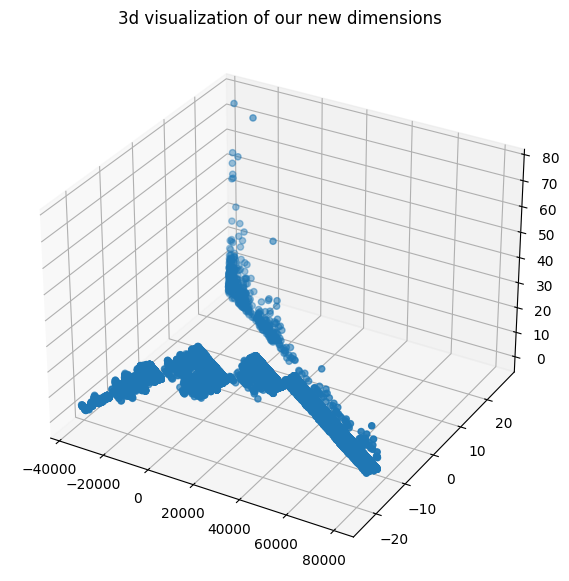

In [101]:
#visualizing our new data dimension 

x=pca_df["col1"]
y=pca_df["col2"]
z=pca_df["col3"]

fig = plt.figure(figsize = (10,7))
ax=fig.add_subplot(111,projection ="3d")
ax.scatter(x,y,z,marker="o")
ax.set_title("3d visualization of our new dimensions")


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=10))

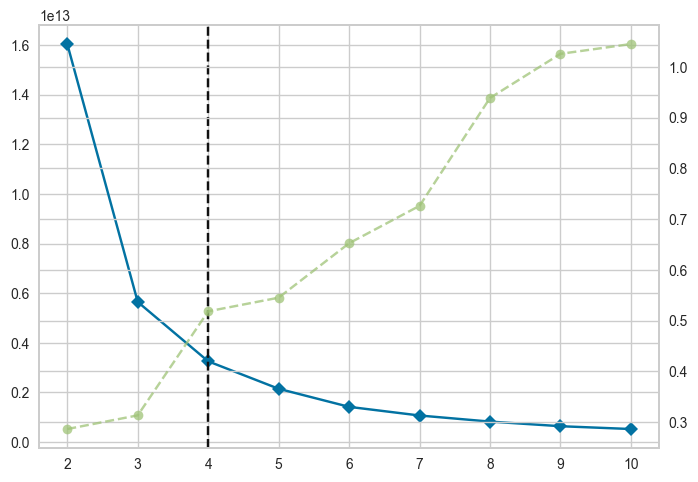

In [102]:
# Using the K-Elbow method to figure /determine the appropriate number of clusters
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

elbow_k = KElbowVisualizer(estimator=KMeans())
elbow_k.fit(pca_df)

In [103]:
#Apply Kmeans clustering

kmeans = KMeans(n_clusters=4,random_state=42)
y_means = kmeans.fit_predict(pca_df)
pca_df["clusters"] =y_means
df["clusters"] =y_means

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [104]:
pca_df.clusters.value_counts()

1    20380
3    20213
0    17337
2     5716
Name: clusters, dtype: int64

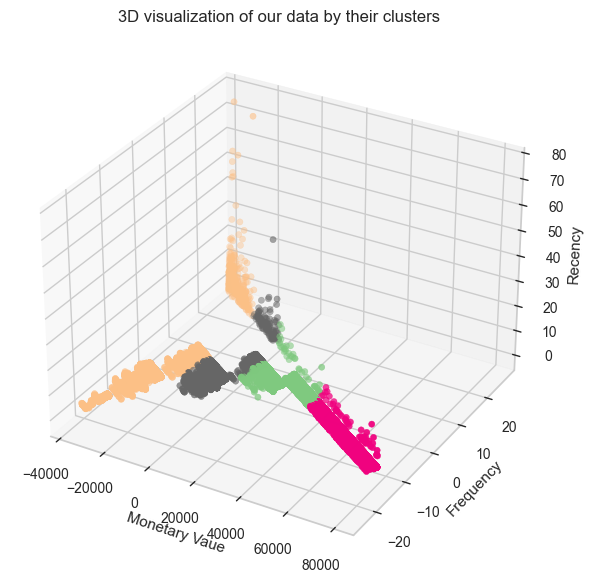

In [105]:
#plotting new data points 
cmap = "Accent"
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection="3d")
ax.scatter(x, y, z, c=pca_df['clusters'], marker="o", cmap=cmap)
ax.set_title("3D visualization of our data by their clusters")
ax.set_xlabel("Monetary Vaue")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")
plt.show()


Text(0.5, 1.0, 'distribution of the new clusters')

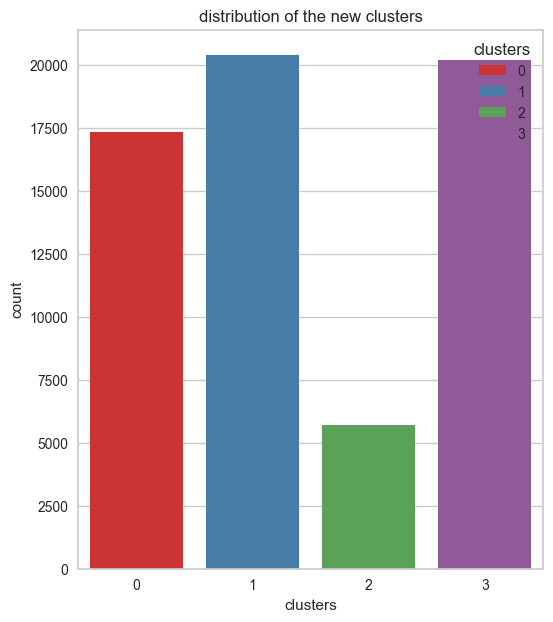

In [106]:
plt.figure(figsize=(6, 7))
sns.countplot(x = pca_df.clusters)
sns.countplot(x='clusters', data=pca_df, hue='clusters', palette='Set1')
plt.title("distribution of the new clusters")

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score  # Import silhouette_score

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Focal Cell
X = pca_df[['clusters']]  # Reshape 'X' to a 2D array
cluster_labels = kmeans.fit_predict(X)

# Compute silhouette score
silhouette_avg = silhouette_score(X, cluster_labels)

# Print the silhouette score
print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for 4 clusters: 1.0


Interpretation:

The perfect silhouette score 1, suggests that the choice of 4 clusters is highly appropriate for your data, 
and the clustering algorithm has assigned data points to clusters in a way that maximizes their similarity within clusters
and dissimilarity between clusters.

In [108]:
# To Normalise the data since the clusters  since its skewed to one side...  a Log Transformation.

import pandas as pd
import numpy as np

# Apply log transformation to the entire DataFrame
log_transformed_df = np.log1p(pca_df.clusters)

C:\Users\hp\AppData\Local\Temp\ipykernel_384\3403693007.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_384\3403693007.py:3: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



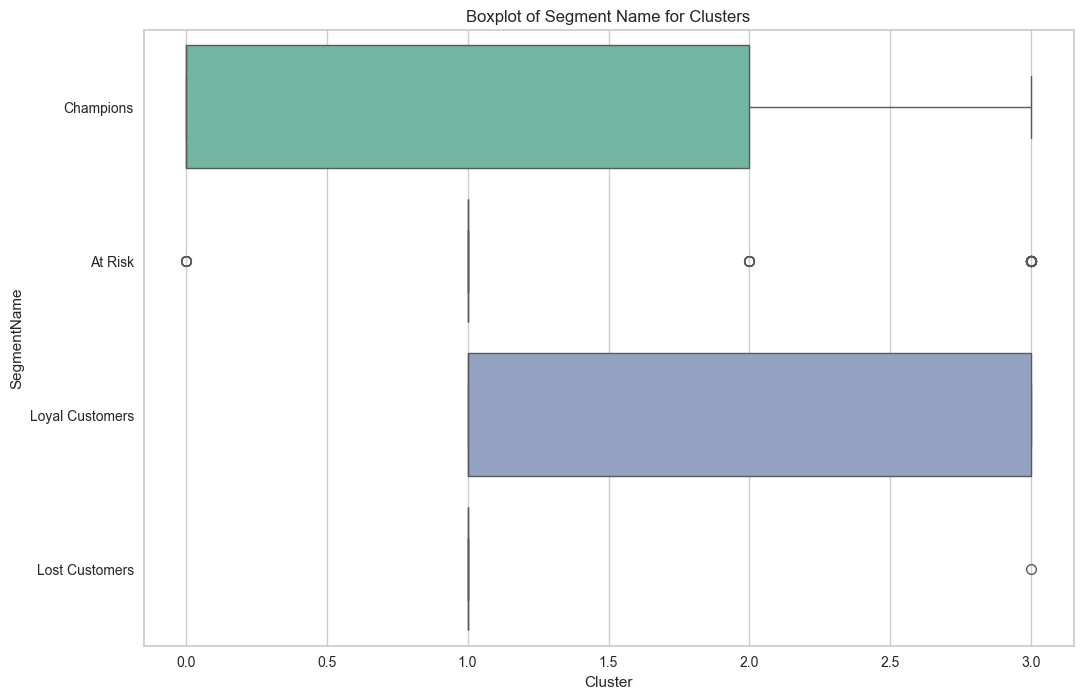

In [109]:
custom_palette = sns.color_palette("Set2")  # Example of creating a custom palette
plt.figure(figsize=(12, 8))
sns.boxplot(x="clusters", y='SegmentName', data=df, palette=custom_palette)
plt.xlabel("Cluster")
plt.ylabel("SegmentName")
plt.title("Boxplot of Segment Name for Clusters")
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_384\1125544467.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_384\1125544467.py:2: UserWarning:

The palette list has more values (8) than needed (4), which may not be intended.



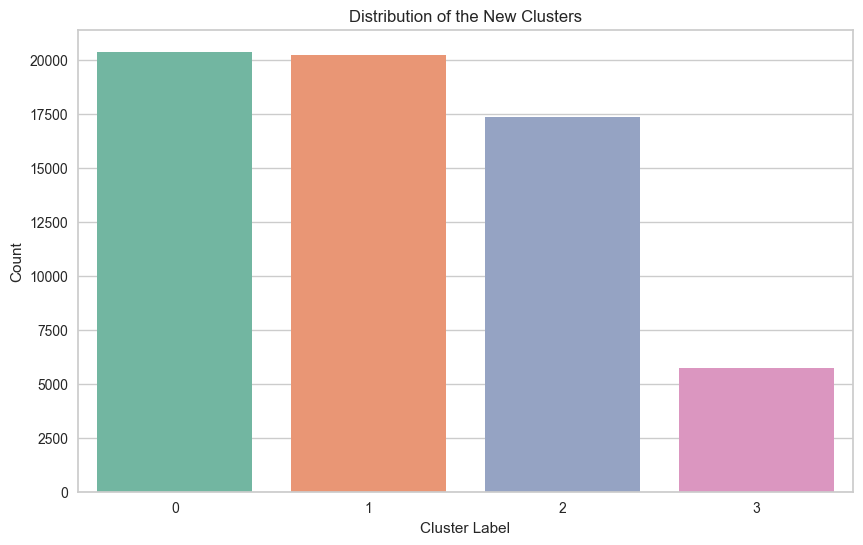

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(x=cluster_labels, palette=custom_palette)  # Use the cluster_labels obtained from kmeans
plt.title("Distribution of the New Clusters")
plt.xlabel("Cluster Label")
plt.ylabel("Count")
plt.show()

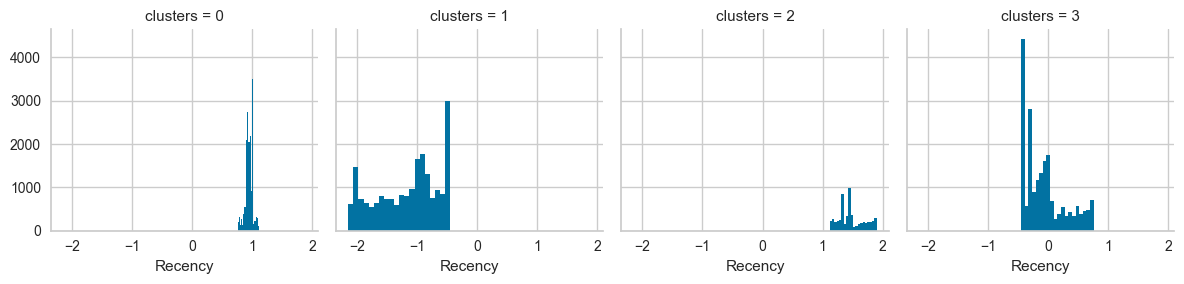

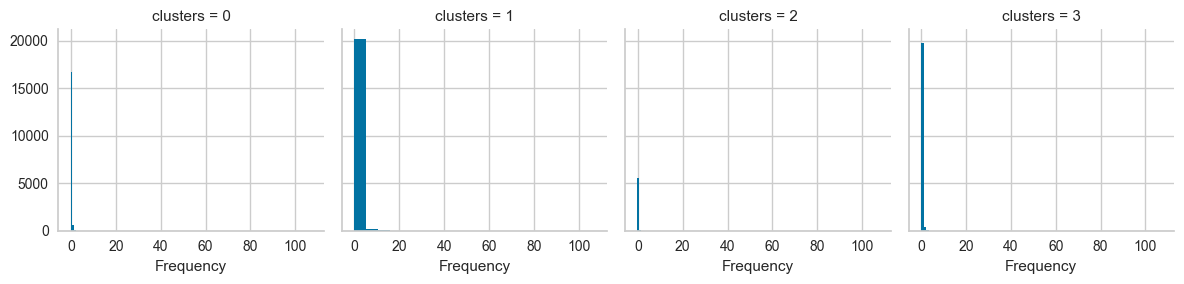

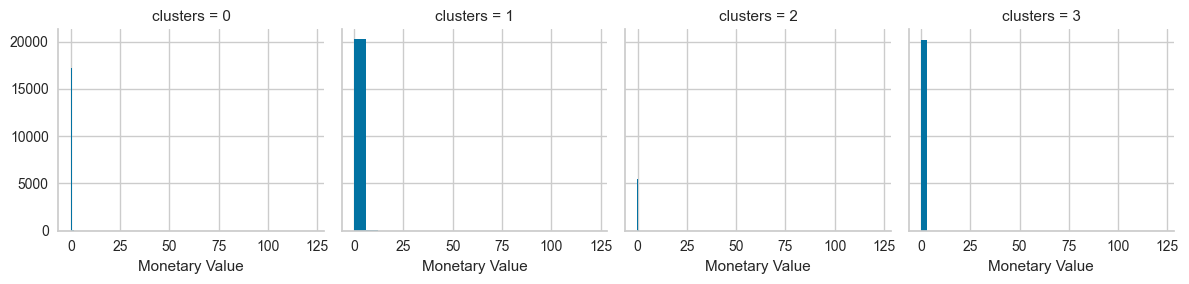

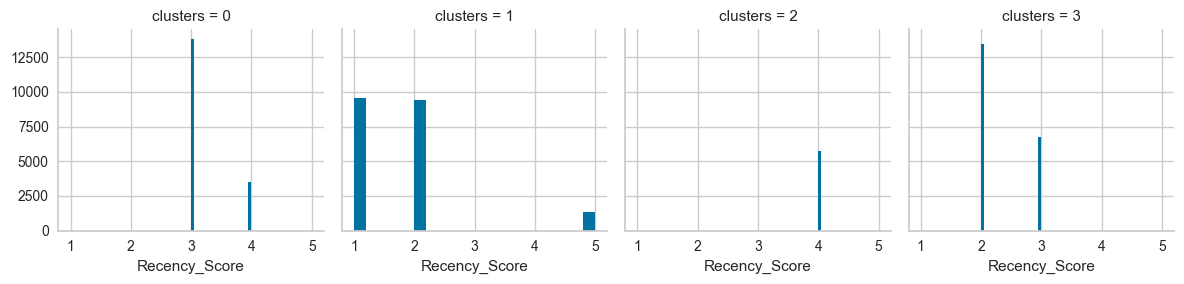

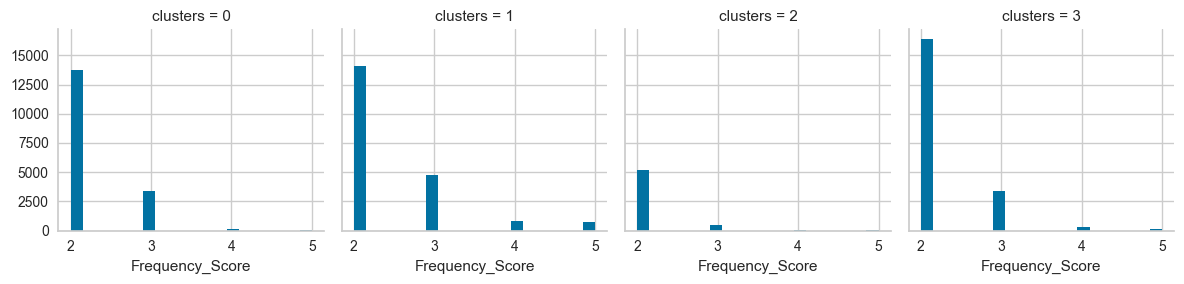

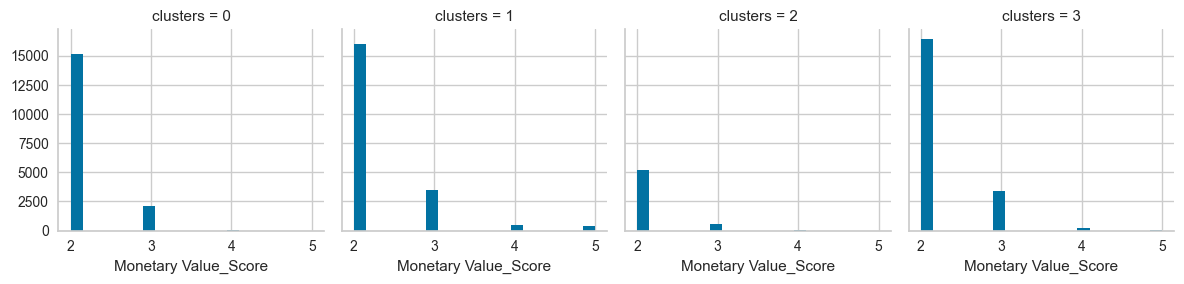

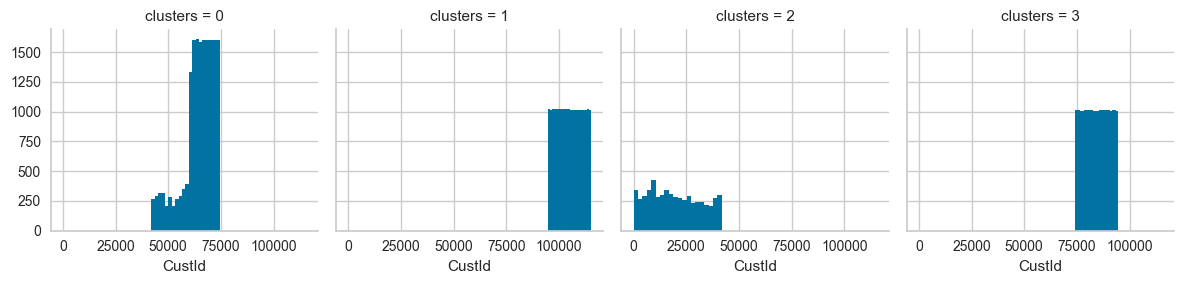

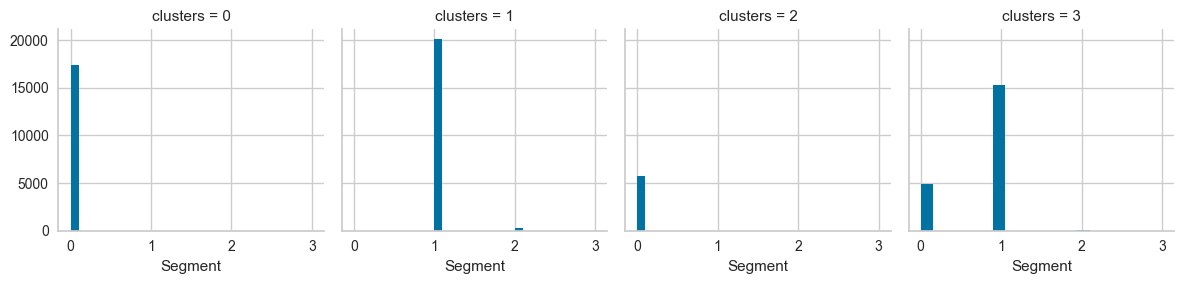

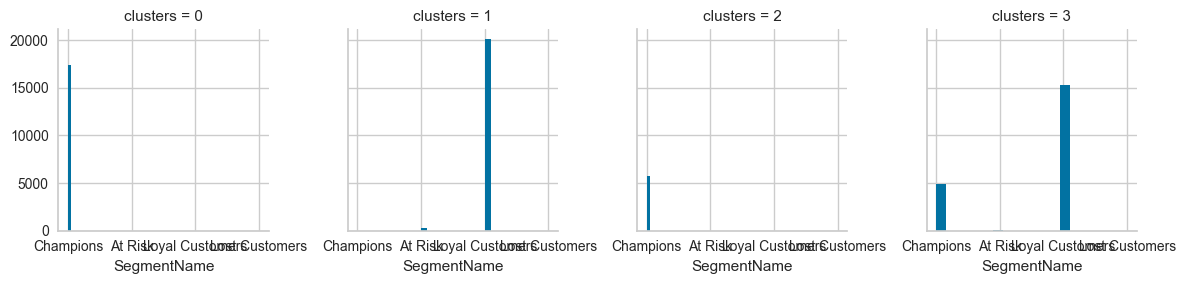

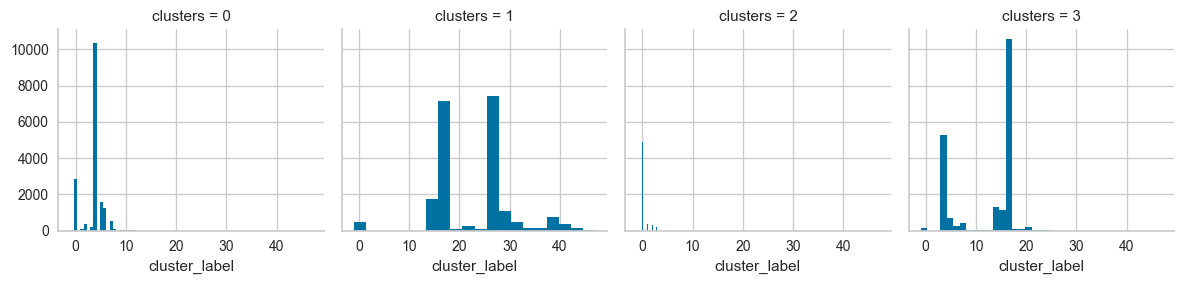

In [111]:
for c in df.drop(["clusters"], axis=1):
    grid = sns.FacetGrid(df, col="clusters")
    grid = grid.map(plt.hist, c, bins=20)  

In [112]:
df["SegmentName"].value_counts()

Loyal Customers    35378
Champions          27968
At Risk              289
Lost Customers        11
Name: SegmentName, dtype: int64